<a href="https://colab.research.google.com/github/prajeeta15/AlgorithmicTrading-ML/blob/main/unsupervised_learning_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y numpy pandas_ta

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install pandas numpy==1.24.4 matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyportfolioopt to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1

In [ ]:
!pip install pandas_ta --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 46.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=62f298985a4a2f22705df12542e8c700d73e208e6eccf9e9df19308fbc8f261b
  Stored in directory: /tmp/pip-ephem-wheel-cache-es0imewi/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

[    Symbol             Security             GICS Sector  \
 0      MMM                   3M             Industrials   
 1      AOS          A. O. Smith             Industrials   
 2      ABT  Abbott Laboratories             Health Care   
 3     ABBV               AbbVie             Health Care   
 4      ACN            Accenture  Information Technology   
 ..     ...                  ...                     ...   
 498    XYL           Xylem Inc.             Industrials   
 499    YUM          Yum! Brands  Consumer Discretionary   
 500   ZBRA   Zebra Technologies  Information Technology   
 501    ZBH        Zimmer Biomet             Health Care   
 502    ZTS               Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care 

In [ ]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',


In [ ]:
end_date ='2025-08-05'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*10)
start_date

df=yf.download(tickers=symbols_list,
               start=start_date,
               end=end_date)
df

[*********************100%***********************]  503 of 503 completed


Price            Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2015-08-10   37.297493   26.934675   45.573162         NaN   41.905560   
2015-08-11   36.329803   25.533054   44.941040         NaN   41.682209   
2015-08-12   35.841347   25.926762   45.270267         NaN   41.434048   
2015-08-13   35.537220   25.906515   45.131985         NaN   41.227249   
2015-08-14   35.620174   26.088751   45.204414         NaN   41.549854   
...                ...         ...         ...         ...         ...   
2025-07-29  119.839996  211.270004  191.220001  136.839996  128.009995   
2025-07-30  118.050003  209.050003  189.309998  134.750000  128.550003   
2025-07-31  114.809998  207.570007  189.020004  132.410004  126.190002   
2025-08-01  113.500000  202.380005  195.220001  128.020004  127.290001   
2025-08-04  114.839996  203.350006  197.190002  130.960007  129.929993   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2015-08-10  23.062458   88.866707   83.620003   49.782623  34.652214  ...   
2015-08-11  23.084646   87.498253   83.900002   48.389130  34.309631  ...   
2015-08-12  22.922995   87.658752   83.820000   48.682495  34.920315  ...   
2015-08-13  23.103664   87.337753   84.309998   48.079468  35.382046  ...   
2015-08-14  23.277996   87.388412   86.120003   47.949074  35.151184  ...   
...               ...         ...         ...         ...        ...  ...   
2025-07-29  86.120003  278.899994  370.700012  230.750000  54.200001  ...   
2025-07-30  85.610001  274.000000  364.000000  231.110001  55.200001  ...   
2025-07-31  86.059998  267.100006  357.690002  224.630005  54.180000  ...   
2025-08-01  88.000000  255.369995  347.799988  221.710007  53.849998  ...   
2025-08-04  88.510002  258.779999  338.850006  222.399994  54.360001  ...   

Price        Volume                                                   \
Ticker           WY     WYNN      XEL       XOM      XYL         XYZ   
Date                                                                   
2015-08-10  3509700  2365300  2813700  14876000  1165600         NaN   
2015-08-11  3317100  2669000  3270900  14486400  1099300         NaN   
2015-08-12  3431500  2760000  3889000  16492400   975800         NaN   
2015-08-13  5021300  2229700  2410700  13154100  1368500         NaN   
2015-08-14  3993900  2178600  1568900   9129300  1194900         NaN   
...             ...      ...      ...       ...      ...         ...   
2025-07-29  3968200  1463200  3163700  15928000   809100  10632000.0   
2025-07-30  3961900  1438600  4844900  12996900  1735100   7352200.0   
2025-07-31  5651500  3582500  4367500  17233700  3538900   6769800.0   
2025-08-01  4684500  1650900  4005100  19652000  2023900   8235300.0   
2025-08-04  3823200  1459800  5851800  19116800  1593600   6077700.0   

Price                                            
Ticker           YUM      ZBH     ZBRA      ZTS  
Date                                             
2015-08-10   1793277  1243004   754200  3064500  
2015-08-11  13429966  1739464  4453300  1946700  
2015-08-12  16536486  1171625  1978000  3520300  
2015-08-13  10922688  1317679   900000  2574800  
2015-08-14   5215555  1522958  1013600  2594500  
...              ...      ...      ...      ...  
2025-07-29   2472600  1382500   236900  3366900  
2025-07-30   1643800  1754900   368000  3036300  
2025-07-31   2653500  1801600  1351200  4855300  
2025-08-01   1930700  2308400   976400  3153100  
2025-08-04   3349900  1913600  1032100  6269600  

[2511 rows x 2515 columns]

In [ ]:
df = df.stack()

In [ ]:
df.index.names=['date','ticker']
df.columns = df.columns.str.lower()
df

Price                   close        high         low        open       volume
date       ticker                                                             
2015-08-10 A        37.297493   37.454165   37.011793   37.085523    1554500.0
           AAPL     26.934675   26.995419   26.216987   26.216987  219806400.0
           ABBV     45.573162   45.718028   45.105644   45.382203    8189400.0
           ABT      41.905560   42.327426   41.682217   41.707032    3729300.0
           ACGL     23.062458   23.075138   22.916655   22.916655     962400.0
...                       ...         ...         ...         ...          ...
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997    6077700.0
           YUM     147.000000  147.759995  144.669998  145.080002    3349900.0
           ZBH      92.400002   92.660004   90.110001   90.500000    1913600.0
           ZBRA    341.359985  342.410004  337.019989  337.859985    1032100.0
           ZTS     151.809998  152.589996  148.759995  151.250000    6269600.0

[1230734 rows x 5 columns]

In [ ]:
df['adj_close'] = df['close'] - df['open']
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  
date       ticker                          
2015-08-10 A         1554500.0   0.211970  
           AAPL    219806400.0   0.717689  
           ABBV      8189400.0   0.190959  
           ABT       3729300.0   0.198528  
           ACGL       962400.0   0.145803  
...                        ...        ...  
2025-08-04 XYZ       6077700.0   1.100006  
           YUM       3349900.0   1.919998  
           ZBH       1913600.0   1.900002  
           ZBRA      1032100.0   3.500000  
           ZTS       6269600.0   0.559998  

[1230734 rows x 6 columns]

#2. Calculate features and technical indicators for each stock
- Garman- Klass Volatility
- RSI
- Bollinger Bands
- ATR
- MACD
- Dollar Volume

In [ ]:
df['garman_klass_vol']= (((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj_close'])-np.log(df['open']))**2))
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  garman_klass_vol  
date       ticker                                            
2015-08-10 A         1554500.0   0.211970        -10.303354  
           AAPL    219806400.0   0.717689         -5.000739  
           ABBV      8189400.0   0.190959        -11.561639  
           ABT       3729300.0   0.198528        -11.046250  
           ACGL       962400.0   0.145803         -9.880197  
...                        ...        ...               ...  
2025-08-04 XYZ       6077700.0   1.100006         -6.886810  
           YUM       3349900.0   1.919998         -7.225524  
           ZBH       1913600.0   1.900002         -5.765670  
           ZBRA      1032100.0   3.500000         -8.067129  
           ZTS       6269600.0   0.559998        -12.108491  

[1230734 rows x 7 columns]

In [ ]:
df['rsi']=df.groupby(level=1)['adj_close'].transform(lambda x: pandas_ta.rsi(close =x, length=20))
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  garman_klass_vol        rsi  
date       ticker                                                       
2015-08-10 A         1554500.0   0.211970        -10.303354        NaN  
           AAPL    219806400.0   0.717689         -5.000739        NaN  
           ABBV      8189400.0   0.190959        -11.561639        NaN  
           ABT       3729300.0   0.198528        -11.046250        NaN  
           ACGL       962400.0   0.145803         -9.880197        NaN  
...                        ...        ...               ...        ...  
2025-08-04 XYZ       6077700.0   1.100006         -6.886810  51.706210  
           YUM       3349900.0   1.919998         -7.225524  52.571955  
           ZBH       1913600.0   1.900002         -5.765670  53.391493  
           ZBRA      1032100.0   3.500000         -8.067129  51.549993  
           ZTS       6269600.0   0.559998        -12.108491  50.977004  

[1230734 rows x 8 columns]

In [ ]:
df['bb_lowerband']=df.groupby(level=1)['adj_close'].transform(lambda x: pandas_ta.bbands(close =np.log1p(x), length=20).iloc[:,0])

df['bb_midband']=df.groupby(level=1)['adj_close'].transform(lambda x: pandas_ta.bbands(close =np.log1p(x), length=20).iloc[:,1])

df['bb_upperband']=df.groupby(level=1)['adj_close'].transform(lambda x: pandas_ta.bbands(close =np.log1p(x), length=20).iloc[:,2])
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                        
2015-08-10 A         1554500.0   0.211970        -10.303354        NaN   
           AAPL    219806400.0   0.717689         -5.000739        NaN   
           ABBV      8189400.0   0.190959        -11.561639        NaN   
           ABT       3729300.0   0.198528        -11.046250        NaN   
           ACGL       962400.0   0.145803         -9.880197        NaN   
...                        ...        ...               ...        ...   
2025-08-04 XYZ       6077700.0   1.100006         -6.886810  51.706210   
           YUM       3349900.0   1.919998         -7.225524  52.571955   
           ZBH       1913600.0   1.900002         -5.765670  53.391493   
           ZBRA      1032100.0   3.500000         -8.067129  51.549993   
           ZTS       6269600.0   0.559998        -12.108491  50.977004   

Price              bb_lowerband  bb_midband  bb_upperband  
date       ticker                                          
2015-08-10 A                NaN         NaN           NaN  
           AAPL             NaN         NaN           NaN  
           ABBV             NaN         NaN           NaN  
           ABT              NaN         NaN           NaN  
           ACGL             NaN         NaN           NaN  
...                         ...         ...           ...  
2025-08-04 XYZ              NaN         NaN           NaN  
           YUM              NaN         NaN           NaN  
           ZBH              NaN         NaN           NaN  
           ZBRA             NaN         NaN           NaN  
           ZTS              NaN         NaN           NaN  

[1230734 rows x 11 columns]

In [ ]:
def computer_atr(stock_data):
  atr = pandas_ta.atr(high=stock_data['high'],
                      low=stock_data['low'],
                      close=stock_data['close'],
                      length=20)
  return atr.sub(atr.mean()).div(atr.std())

df['atr']=df.groupby(level=1, group_keys=False).apply(computer_atr)
df


Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                        
2015-08-10 A         1554500.0   0.211970        -10.303354        NaN   
           AAPL    219806400.0   0.717689         -5.000739        NaN   
           ABBV      8189400.0   0.190959        -11.561639        NaN   
           ABT       3729300.0   0.198528        -11.046250        NaN   
           ACGL       962400.0   0.145803         -9.880197        NaN   
...                        ...        ...               ...        ...   
2025-08-04 XYZ       6077700.0   1.100006         -6.886810  51.706210   
           YUM       3349900.0   1.919998         -7.225524  52.571955   
           ZBH       1913600.0   1.900002         -5.765670  53.391493   
           ZBRA      1032100.0   3.500000         -8.067129  51.549993   
           ZTS       6269600.0   0.559998        -12.108491  50.977004   

Price              bb_lowerband  bb_midband  bb_upperband       atr  
date       ticker                                                    
2015-08-10 A                NaN         NaN           NaN       NaN  
           AAPL             NaN         NaN           NaN       NaN  
           ABBV             NaN         NaN           NaN       NaN  
           ABT              NaN         NaN           NaN       NaN  
           ACGL             NaN         NaN           NaN       NaN  
...                         ...         ...           ...       ...  
2025-08-04 XYZ              NaN         NaN           NaN -0.428439  
           YUM              NaN         NaN           NaN  1.137906  
           ZBH              NaN         NaN           NaN -0.539091  
           ZBRA             NaN         NaN           NaN  0.324472  
           ZTS              NaN         NaN           NaN  0.419229  

[1230734 rows x 12 columns]

In [ ]:
def compute_macd(close):
  macd=pandas_ta.macd(close=close, length=20).iloc[:,0]
  return macd.sub(macd.mean()).div(macd.std())

df['macd']=df.groupby(level=1, group_keys=False)['adj_close'].apply(compute_macd)
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                        
2015-08-10 A         1554500.0   0.211970        -10.303354        NaN   
           AAPL    219806400.0   0.717689         -5.000739        NaN   
           ABBV      8189400.0   0.190959        -11.561639        NaN   
           ABT       3729300.0   0.198528        -11.046250        NaN   
           ACGL       962400.0   0.145803         -9.880197        NaN   
...                        ...        ...               ...        ...   
2025-08-04 XYZ       6077700.0   1.100006         -6.886810  51.706210   
           YUM       3349900.0   1.919998         -7.225524  52.571955   
           ZBH       1913600.0   1.900002         -5.765670  53.391493   
           ZBRA      1032100.0   3.500000         -8.067129  51.549993   
           ZTS       6269600.0   0.559998        -12.108491  50.977004   

Price              bb_lowerband  bb_midband  bb_upperband       atr      macd  
date       ticker                                                              
2015-08-10 A                NaN         NaN           NaN       NaN       NaN  
           AAPL             NaN         NaN           NaN       NaN       NaN  
           ABBV             NaN         NaN           NaN       NaN       NaN  
           ABT              NaN         NaN           NaN       NaN       NaN  
           ACGL             NaN         NaN           NaN       NaN       NaN  
...                         ...         ...           ...       ...       ...  
2025-08-04 XYZ              NaN         NaN           NaN -0.428439 -0.111996  
           YUM              NaN         NaN           NaN  1.137906  0.610565  
           ZBH              NaN         NaN           NaN -0.539091 -0.073920  
           ZBRA             NaN         NaN           NaN  0.324472  0.658653  
           ZTS              NaN         NaN           NaN  0.419229 -0.057426  

[1230734 rows x 13 columns]

In [ ]:
df['dollar_volume']=(df['adj_close']*df['volume'])/1e6
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-08-10 A        37.297493   37.454165   37.011793   37.085523   
           AAPL     26.934675   26.995419   26.216987   26.216987   
           ABBV     45.573162   45.718028   45.105644   45.382203   
           ABT      41.905560   42.327426   41.682217   41.707032   
           ACGL     23.062458   23.075138   22.916655   22.916655   
...                       ...         ...         ...         ...   
2025-08-04 XYZ      76.120003   76.629997   74.419998   75.019997   
           YUM     147.000000  147.759995  144.669998  145.080002   
           ZBH      92.400002   92.660004   90.110001   90.500000   
           ZBRA    341.359985  342.410004  337.019989  337.859985   
           ZTS     151.809998  152.589996  148.759995  151.250000   

Price                   volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                        
2015-08-10 A         1554500.0   0.211970        -10.303354        NaN   
           AAPL    219806400.0   0.717689         -5.000739        NaN   
           ABBV      8189400.0   0.190959        -11.561639        NaN   
           ABT       3729300.0   0.198528        -11.046250        NaN   
           ACGL       962400.0   0.145803         -9.880197        NaN   
...                        ...        ...               ...        ...   
2025-08-04 XYZ       6077700.0   1.100006         -6.886810  51.706210   
           YUM       3349900.0   1.919998         -7.225524  52.571955   
           ZBH       1913600.0   1.900002         -5.765670  53.391493   
           ZBRA      1032100.0   3.500000         -8.067129  51.549993   
           ZTS       6269600.0   0.559998        -12.108491  50.977004   

Price              bb_lowerband  bb_midband  bb_upperband       atr      macd  \
date       ticker                                                               
2015-08-10 A                NaN         NaN           NaN       NaN       NaN   
           AAPL             NaN         NaN           NaN       NaN       NaN   
           ABBV             NaN         NaN           NaN       NaN       NaN   
           ABT              NaN         NaN           NaN       NaN       NaN   
           ACGL             NaN         NaN           NaN       NaN       NaN   
...                         ...         ...           ...       ...       ...   
2025-08-04 XYZ              NaN         NaN           NaN -0.428439 -0.111996   
           YUM              NaN         NaN           NaN  1.137906  0.610565   
           ZBH              NaN         NaN           NaN -0.539091 -0.073920   
           ZBRA             NaN         NaN           NaN  0.324472  0.658653   
           ZTS              NaN         NaN           NaN  0.419229 -0.057426   

Price              dollar_volume  
date       ticker                 
2015-08-10 A            0.329507  
           AAPL       157.752547  
           ABBV         1.563838  
           ABT          0.740369  
           ACGL         0.140321  
...                          ...  
2025-08-04 XYZ          6.685507  
           YUM          6.431802  
           ZBH          3.635843  
           ZBRA         3.612350  
           ZTS          3.510961  

[1230734 rows x 14 columns]

#3. Aggregate to monthly level and filter top 150 most liquid stocks for each month
- to reduce training time and experiment with features and strategies we convert the business daily data to month end frequency

In [ ]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]
last_cols

['adj_close',
 'garman_klass_vol',
 'rsi',
 'bb_lowerband',
 'bb_midband',
 'bb_upperband',
 'atr',
 'macd']

In [ ]:
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), df.unstack()[last_cols].resample('M').last().stack('ticker')], axis=1)).dropna()
data

dollar_volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                          
2015-09-30 A           -0.166781   0.231071         -9.331570  51.833927   
           AAPL       -20.777046   0.029249        -17.559599  49.774357   
           ABT         -2.145216   0.314334         -8.361221  53.142647   
           ACGL         0.150226   0.006339        -26.029533  48.863846   
           ADM         -0.537442  -0.029968        -11.971205  50.473823   
...                          ...        ...               ...        ...   
2025-08-31 VTRS         0.701364   0.120000         -7.133342  51.940814   
           VZ          -3.250460   0.150002        -12.347342  50.820518   
           WBA          0.048398  -0.010000        -12.418392  48.612591   
           WY          -0.002941   0.170000         -9.637230  51.097013   
           XEL          0.534109   0.470001         -9.874726  51.045382   

                   bb_lowerband  bb_midband  bb_upperband       atr      macd  
date       ticker                                                              
2015-09-30 A          -1.301310   -0.140343      1.020623 -1.200615  0.166312  
           AAPL       -1.414104   -0.166238      1.081628 -0.944931 -0.259249  
           ABT        -1.569942   -0.262958      1.044026 -0.797440 -0.086855  
           ACGL       -0.253015    0.074066      0.401147 -0.992521  0.509878  
           ADM        -1.363144   -0.237195      0.888754 -0.672940 -0.665638  
...                         ...         ...           ...       ...       ...  
2025-08-31 VTRS       -0.364750   -0.025899      0.312951 -0.990030 -0.174594  
           VZ         -0.791683   -0.051097      0.689489  0.432929  0.419621  
           WBA        -0.040301    0.007680      0.055661 -2.576043 -0.016639  
           WY         -0.912123   -0.111465      0.689194  0.145896 -0.234097  
           XEL        -2.107463   -0.027415      2.052632  0.596111  0.035723  

[23115 rows x 9 columns]

- calculate 5 year rolling average of dollar volume for each stocks before filtering.

In [ ]:
available_periods = (
    data.reset_index()
        .groupby('ticker')['date']
        .nunique()
        .min()
)

rolling_months = min(available_periods, 60)  # max 5 years, or less if not enough data

data['dollar_volume'] = (data.loc[:,'dollar_volume']
    .unstack('ticker')
    .rolling(rolling_months)
    .mean()
    .stack()
)
data

dollar_volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                          
2015-09-30 A           -0.166781   0.231071         -9.331570  51.833927   
           AAPL       -20.777046   0.029249        -17.559599  49.774357   
           ABT         -2.145216   0.314334         -8.361221  53.142647   
           ACGL         0.150226   0.006339        -26.029533  48.863846   
           ADM         -0.537442  -0.029968        -11.971205  50.473823   
...                          ...        ...               ...        ...   
2025-08-31 VTRS         0.701364   0.120000         -7.133342  51.940814   
           VZ          -3.250460   0.150002        -12.347342  50.820518   
           WBA          0.048398  -0.010000        -12.418392  48.612591   
           WY          -0.002941   0.170000         -9.637230  51.097013   
           XEL          0.534109   0.470001         -9.874726  51.045382   

                   bb_lowerband  bb_midband  bb_upperband       atr      macd  
date       ticker                                                              
2015-09-30 A          -1.301310   -0.140343      1.020623 -1.200615  0.166312  
           AAPL       -1.414104   -0.166238      1.081628 -0.944931 -0.259249  
           ABT        -1.569942   -0.262958      1.044026 -0.797440 -0.086855  
           ACGL       -0.253015    0.074066      0.401147 -0.992521  0.509878  
           ADM        -1.363144   -0.237195      0.888754 -0.672940 -0.665638  
...                         ...         ...           ...       ...       ...  
2025-08-31 VTRS       -0.364750   -0.025899      0.312951 -0.990030 -0.174594  
           VZ         -0.791683   -0.051097      0.689489  0.432929  0.419621  
           WBA        -0.040301    0.007680      0.055661 -2.576043 -0.016639  
           WY         -0.912123   -0.111465      0.689194  0.145896 -0.234097  
           XEL        -2.107463   -0.027415      2.052632  0.596111  0.035723  

[23115 rows x 9 columns]

In [ ]:
data['dollar_vol_rank']= (data.groupby('date')['dollar_volume'].rank(ascending=False))
data

dollar_volume  adj_close  garman_klass_vol        rsi  \
date       ticker                                                          
2015-09-30 A           -0.166781   0.231071         -9.331570  51.833927   
           AAPL       -20.777046   0.029249        -17.559599  49.774357   
           ABT         -2.145216   0.314334         -8.361221  53.142647   
           ACGL         0.150226   0.006339        -26.029533  48.863846   
           ADM         -0.537442  -0.029968        -11.971205  50.473823   
...                          ...        ...               ...        ...   
2025-08-31 VTRS         0.701364   0.120000         -7.133342  51.940814   
           VZ          -3.250460   0.150002        -12.347342  50.820518   
           WBA          0.048398  -0.010000        -12.418392  48.612591   
           WY          -0.002941   0.170000         -9.637230  51.097013   
           XEL          0.534109   0.470001         -9.874726  51.045382   

                   bb_lowerband  bb_midband  bb_upperband       atr      macd  \
date       ticker                                                               
2015-09-30 A          -1.301310   -0.140343      1.020623 -1.200615  0.166312   
           AAPL       -1.414104   -0.166238      1.081628 -0.944931 -0.259249   
           ABT        -1.569942   -0.262958      1.044026 -0.797440 -0.086855   
           ACGL       -0.253015    0.074066      0.401147 -0.992521  0.509878   
           ADM        -1.363144   -0.237195      0.888754 -0.672940 -0.665638   
...                         ...         ...           ...       ...       ...   
2025-08-31 VTRS       -0.364750   -0.025899      0.312951 -0.990030 -0.174594   
           VZ         -0.791683   -0.051097      0.689489  0.432929  0.419621   
           WBA        -0.040301    0.007680      0.055661 -2.576043 -0.016639   
           WY         -0.912123   -0.111465      0.689194  0.145896 -0.234097   
           XEL        -2.107463   -0.027415      2.052632  0.596111  0.035723   

                   dollar_vol_rank  
date       ticker                   
2015-09-30 A                 151.0  
           AAPL              229.0  
           ABT               218.0  
           ACGL               42.0  
           ADM               192.0  
...                            ...  
2025-08-31 VTRS               27.0  
           VZ                 56.0  
           WBA                41.0  
           WY                 42.0  
           XEL                29.0  

[23115 rows x 10 columns]

In [ ]:
data = data[data['dollar_vol_rank']<=150].drop(['dollar_vol_rank','dollar_volume'], axis=1)
data

adj_close  garman_klass_vol        rsi  bb_lowerband  \
date       ticker                                                         
2015-09-30 ACGL     0.006339        -26.029533  48.863846     -0.253015   
           ADP      0.178377        -13.437222  50.014561     -1.035450   
           AEE      0.277035         -8.640724  52.480575     -0.377871   
           AEP      0.360390         -8.550982  52.318654     -0.791561   
           AFL     -0.067490         -7.959469  48.918466     -0.523875   
...                      ...               ...        ...           ...   
2025-08-31 VTRS     0.120000         -7.133342  51.940814     -0.364750   
           VZ       0.150002        -12.347342  50.820518     -0.791683   
           WBA     -0.010000        -12.418392  48.612591     -0.040301   
           WY       0.170000         -9.637230  51.097013     -0.912123   
           XEL      0.470001         -9.874726  51.045382     -2.107463   

                   bb_midband  bb_upperband       atr      macd  
date       ticker                                                
2015-09-30 ACGL      0.074066      0.401147 -0.992521  0.509878  
           ADP       0.086479      1.208409 -0.991136  0.035305  
           AEE       0.089421      0.556713 -1.085750  0.451725  
           AEP       0.016757      0.825074 -0.891116  0.459491  
           AFL      -0.024778      0.474320 -0.921415  0.331142  
...                       ...           ...       ...       ...  
2025-08-31 VTRS     -0.025899      0.312951 -0.990030 -0.174594  
           VZ       -0.051097      0.689489  0.432929  0.419621  
           WBA       0.007680      0.055661 -2.576043 -0.016639  
           WY       -0.111465      0.689194  0.145896 -0.234097  
           XEL      -0.027415      2.052632  0.596111  0.035723  

[16047 rows x 8 columns]

#4. Calculate monthly returns for different time horizons as features
-  to capture time series dynamics that reflect- momentume patterns, we compute historical returns using the method .pct_change(lag), i.e. returns over various monthyl periods as identified by lags

- outlier clipping - whichever value is above the threshold value is set to the threshold value

In [ ]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:
         df[f'return_{lag}m'] = (df['adj_close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                upper=x.quantile(1-outlier_cutoff)))
                               .add(1)
                               .pow(1/lag)
                               .sub(1))
    return df
data = data.groupby(level=1, group_keys=False).apply(calculate_returns)
data

adj_close  garman_klass_vol        rsi  bb_lowerband  \
date       ticker                                                         
2015-09-30 ACGL     0.006339        -26.029533  48.863846     -0.253015   
           ADP      0.178377        -13.437222  50.014561     -1.035450   
           AEE      0.277035         -8.640724  52.480575     -0.377871   
           AEP      0.360390         -8.550982  52.318654     -0.791561   
           AFL     -0.067490         -7.959469  48.918466     -0.523875   
...                      ...               ...        ...           ...   
2025-08-31 VTRS     0.120000         -7.133342  51.940814     -0.364750   
           VZ       0.150002        -12.347342  50.820518     -0.791683   
           WBA     -0.010000        -12.418392  48.612591     -0.040301   
           WY       0.170000         -9.637230  51.097013     -0.912123   
           XEL      0.470001         -9.874726  51.045382     -2.107463   

                   bb_midband  bb_upperband       atr      macd  return_1m  \
date       ticker                                                            
2015-09-30 ACGL      0.074066      0.401147 -0.992521  0.509878        NaN   
           ADP       0.086479      1.208409 -0.991136  0.035305        NaN   
           AEE       0.089421      0.556713 -1.085750  0.451725        NaN   
           AEP       0.016757      0.825074 -0.891116  0.459491        NaN   
           AFL      -0.024778      0.474320 -0.921415  0.331142        NaN   
...                       ...           ...       ...       ...        ...   
2025-08-31 VTRS     -0.025899      0.312951 -0.990030 -0.174594  -1.521738   
           VZ       -0.051097      0.689489  0.432929  0.419621  -0.680846   
           WBA       0.007680      0.055661 -2.576043 -0.016639  -2.000000   
           WY       -0.111465      0.689194  0.145896 -0.234097  -1.566665   
           XEL      -0.027415      2.052632  0.596111  0.035723  -0.129629   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2015-09-30 ACGL          NaN        NaN        NaN        NaN         NaN  
           ADP           NaN        NaN        NaN        NaN         NaN  
           AEE           NaN        NaN        NaN        NaN         NaN  
           AEP           NaN        NaN        NaN        NaN         NaN  
           AFL           NaN        NaN        NaN        NaN         NaN  
...                      ...        ...        ...        ...         ...  
2025-08-31 VTRS          NaN   0.587405        NaN        NaN   -0.015488  
           VZ      -0.601530  -0.363102        NaN        NaN   -0.087447  
           WBA           NaN        NaN        NaN  -0.180516   -0.123330  
           WY            NaN   0.156160        NaN        NaN         inf  
           XEL      4.932335   0.058146   0.049783        NaN   -0.026415  

[16047 rows x 14 columns]

In [ ]:
data = data.groupby(level=1, group_keys=False).apply(calculate_returns)

print("Before dropna:", data.shape)
print("NaNs per column:\n", data.isna().sum())


Before dropna: (16047, 14)
NaNs per column:
 adj_close               0
garman_klass_vol        0
rsi                     0
bb_lowerband            0
bb_midband              0
bb_upperband            0
atr                     0
macd                    0
return_1m             536
return_2m            8580
return_3m            8675
return_6m            9147
return_9m            9814
return_12m          10306
dtype: int64


#5. download fama-french factors and calculate rolling factor betas
- introduce the fama-french data to estimate the exposure of assets to common risk factors using linear regression
- the five fama - french factors are: market risk, size, value, operating porfitability and investment. they have shown empirical returns and are commonly used to assess the risk/return profile of portfolios, hence, it is natural to include past factor exposures to models.
- we can access the historical factor returns using the pandas-datareader and estimate hsitorical exposures using the rollingOLS

In [ ]:
factor_data = web.DataReader(
    'F-F_Research_Data_5_Factors_2x3',
    'famafrench',
    start='2010')[0].drop('RF', axis=1)

factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.35  0.40  0.33 -1.08  0.51
2010-02    3.39  1.49  3.18 -0.29  1.42
2010-03    6.30  1.83  2.19 -0.61  1.74
2010-04    2.00  4.96  2.96  0.61  1.75
2010-05   -7.90  0.08 -2.48  1.30 -0.24
...         ...   ...   ...   ...   ...
2025-02   -2.43 -4.91  4.91  1.10  3.06
2025-03   -6.39 -1.49  2.90  2.11 -0.47
2025-04   -0.84 -1.86 -3.40 -2.85 -2.67
2025-05    6.06 -0.72 -2.88  1.26  2.51
2025-06    4.86 -0.02 -1.60 -3.19  1.45

[186 rows x 5 columns]

In [ ]:
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data

Mkt-RF     SMB     HML     RMW     CMA
date                                              
2010-01-31 -0.0335  0.0040  0.0033 -0.0108  0.0051
2010-02-28  0.0339  0.0149  0.0318 -0.0029  0.0142
2010-03-31  0.0630  0.0183  0.0219 -0.0061  0.0174
2010-04-30  0.0200  0.0496  0.0296  0.0061  0.0175
2010-05-31 -0.0790  0.0008 -0.0248  0.0130 -0.0024
...            ...     ...     ...     ...     ...
2025-02-28 -0.0243 -0.0491  0.0491  0.0110  0.0306
2025-03-31 -0.0639 -0.0149  0.0290  0.0211 -0.0047
2025-04-30 -0.0084 -0.0186 -0.0340 -0.0285 -0.0267
2025-05-31  0.0606 -0.0072 -0.0288  0.0126  0.0251
2025-06-30  0.0486 -0.0002 -0.0160 -0.0319  0.0145

[186 rows x 5 columns]

In [ ]:
factor_data= factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2015-09-30 ACGL   -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           ADP    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AEE    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AEP    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AFL    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
...                   ...     ...     ...     ...     ...        ...
2025-06-30 WBD     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -2.000000
           WDC     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -1.814021
           WMB     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -0.866813
           WRB     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.192232
           WY      0.0486 -0.0002 -0.0160 -0.0319  0.0145  -3.181804

[15860 rows x 6 columns]

In [ ]:
#factor_data.xs('KMI',level=1).head() #checking

In [ ]:
#factor_data.xs('KIM',level=1).head() #checking - returns should be different but factors should remain same

- filter out stocks with less than 10 months of data

In [ ]:
factor_data = factor_data.groupby(level=1).filter(lambda x: x.shape[0]>10)
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2015-09-30 ACGL   -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           ADP    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AEE    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AEP    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AFL    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
...                   ...     ...     ...     ...     ...        ...
2025-06-30 WBD     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -2.000000
           WDC     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -1.814021
           WMB     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -0.866813
           WRB     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.192232
           WY      0.0486 -0.0002 -0.0160 -0.0319  0.0145  -3.181804

[15194 rows x 6 columns]

In [ ]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >=10]
valid_stocks

ticker
A       21
AAPL    29
ABBV    21
ABT     27
ACGL    60
        ..
XYL     30
XYZ     12
YUM     29
ZBH     15
ZTS     15
Length: 347, dtype: int64

In [ ]:
factor_data = factor_data.loc[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

In [ ]:
factor_data.index.get_level_values('ticker')

Index(['ACGL', 'ADP', 'AEE', 'AEP', 'AFL', 'AIZ', 'AJG', 'ALLE', 'AMD', 'AOS',
       ...
       'USB', 'VICI', 'VTRS', 'VZ', 'WBA', 'WBD', 'WDC', 'WMB', 'WRB', 'WY'],
      dtype='object', name='ticker', length=15194)

In [ ]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2015-09-30 ACGL   -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           ADP    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AEE    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AEP    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
           AFL    -0.0306 -0.0280  0.0055  0.0180 -0.0059        NaN
...                   ...     ...     ...     ...     ...        ...
2025-06-30 WBD     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -2.000000
           WDC     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -1.814021
           WMB     0.0486 -0.0002 -0.0160 -0.0319  0.0145  -0.866813
           WRB     0.0486 -0.0002 -0.0160 -0.0319  0.0145   0.192232
           WY      0.0486 -0.0002 -0.0160 -0.0319  0.0145  -3.181804

[15194 rows x 6 columns]

- calculate rolling factor betas

In [ ]:
betas = (factor_data.groupby(level=1,
                     group_keys=False)
                     .apply(lambda x: RollingOLS(endog=x['return_1m'],
                                                 exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                                 window=min(24, x.shape[0]),
                                                 min_nobs=len(x.columns)+1)
                     .fit(params_only=True)
                     .params
                     .drop('const',axis=1)))
betas

Mkt-RF        SMB        HML         RMW        CMA
date       ticker                                                        
2015-09-30 ACGL          NaN        NaN        NaN         NaN        NaN
           ADP           NaN        NaN        NaN         NaN        NaN
           AEE           NaN        NaN        NaN         NaN        NaN
           AEP           NaN        NaN        NaN         NaN        NaN
           AFL           NaN        NaN        NaN         NaN        NaN
...                      ...        ...        ...         ...        ...
2025-06-30 WBD    -60.546104  60.964511 -41.903234   36.666010  48.956900
           WDC     23.000702 -19.102801  20.337372   17.360691  24.512451
           WMB           NaN        NaN        NaN         NaN        NaN
           WRB    -50.344163 -24.666436 -16.119284 -190.745011 -60.096742
           WY            NaN        NaN        NaN         NaN        NaN

[15194 rows x 5 columns]

- before joining features, we need to shift rolling factor betas, we would know the rolling factor beta 1 month after so we need to shift data to 1 month forward on the ticker level. eg: for october we would get in november

In [ ]:
print("data columns:", data.columns)
print("betas columns:", betas.columns)

data columns: Index(['adj_close', 'garman_klass_vol', 'rsi', 'bb_lowerband', 'bb_midband',
       'bb_upperband', 'atr', 'macd', 'return_1m', 'return_2m', 'return_3m',
       'return_6m', 'return_9m', 'return_12m'],
      dtype='object')
betas columns: Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object')


In [ ]:
shifted_betas = betas.groupby('ticker').shift()
print("shifted_betas columns:", shifted_betas.columns)

shifted_betas columns: Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object')


In [ ]:
data = data.join(shifted_betas, rsuffix='_beta')
data

adj_close  garman_klass_vol        rsi  bb_lowerband  \
date       ticker                                                         
2015-09-30 ACGL     0.006339        -26.029533  48.863846     -0.253015   
           ADP      0.178377        -13.437222  50.014561     -1.035450   
           AEE      0.277035         -8.640724  52.480575     -0.377871   
           AEP      0.360390         -8.550982  52.318654     -0.791561   
           AFL     -0.067490         -7.959469  48.918466     -0.523875   
...                      ...               ...        ...           ...   
2025-08-31 VTRS     0.120000         -7.133342  51.940814     -0.364750   
           VZ       0.150002        -12.347342  50.820518     -0.791683   
           WBA     -0.010000        -12.418392  48.612591     -0.040301   
           WY       0.170000         -9.637230  51.097013     -0.912123   
           XEL      0.470001         -9.874726  51.045382     -2.107463   

                   bb_midband  bb_upperband       atr      macd  return_1m  \
date       ticker                                                            
2015-09-30 ACGL      0.074066      0.401147 -0.992521  0.509878        NaN   
           ADP       0.086479      1.208409 -0.991136  0.035305        NaN   
           AEE       0.089421      0.556713 -1.085750  0.451725        NaN   
           AEP       0.016757      0.825074 -0.891116  0.459491        NaN   
           AFL      -0.024778      0.474320 -0.921415  0.331142        NaN   
...                       ...           ...       ...       ...        ...   
2025-08-31 VTRS     -0.025899      0.312951 -0.990030 -0.174594  -1.521738   
           VZ       -0.051097      0.689489  0.432929  0.419621  -0.680846   
           WBA       0.007680      0.055661 -2.576043 -0.016639  -2.000000   
           WY       -0.111465      0.689194  0.145896 -0.234097  -1.566665   
           XEL      -0.027415      2.052632  0.596111  0.035723  -0.129629   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2015-09-30 ACGL          NaN        NaN        NaN        NaN         NaN   
           ADP           NaN        NaN        NaN        NaN         NaN   
           AEE           NaN        NaN        NaN        NaN         NaN   
           AEP           NaN        NaN        NaN        NaN         NaN   
           AFL           NaN        NaN        NaN        NaN         NaN   
...                      ...        ...        ...        ...         ...   
2025-08-31 VTRS          NaN   0.587405        NaN        NaN   -0.015488   
           VZ      -0.601530  -0.363102        NaN        NaN   -0.087447   
           WBA           NaN        NaN        NaN  -0.180516   -0.123330   
           WY            NaN   0.156160        NaN        NaN         inf   
           XEL      4.932335   0.058146   0.049783        NaN   -0.026415   

                   Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                              
2015-09-30 ACGL       NaN  NaN  NaN  NaN  NaN  
           ADP        NaN  NaN  NaN  NaN  NaN  
           AEE        NaN  NaN  NaN  NaN  NaN  
           AEP        NaN  NaN  NaN  NaN  NaN  
           AFL        NaN  NaN  NaN  NaN  NaN  
...                   ...  ...  ...  ...  ...  
2025-08-31 VTRS       NaN  NaN  NaN  NaN  NaN  
           VZ         NaN  NaN  NaN  NaN  NaN  
           WBA        NaN  NaN  NaN  NaN  NaN  
           WY         NaN  NaN  NaN  NaN  NaN  
           XEL        NaN  NaN  NaN  NaN  NaN  

[16047 rows x 19 columns]

- we want to impute the missing values of each factor with avg for that factor beta
- how?

In [ ]:
data_filled=data.copy()
print(data_filled.columns)

Index(['adj_close', 'garman_klass_vol', 'rsi', 'bb_lowerband', 'bb_midband',
       'bb_upperband', 'atr', 'macd', 'return_1m', 'return_2m', 'return_3m',
       'return_6m', 'return_9m', 'return_12m', 'Mkt-RF', 'SMB', 'HML', 'RMW',
       'CMA'],
      dtype='object')


In [ ]:
factor_data.head()

Mkt-RF    SMB     HML    RMW     CMA  return_1m
date       ticker                                                 
2015-09-30 ACGL   -0.0306 -0.028  0.0055  0.018 -0.0059        NaN
           ADP    -0.0306 -0.028  0.0055  0.018 -0.0059        NaN
           AEE    -0.0306 -0.028  0.0055  0.018 -0.0059        NaN
           AEP    -0.0306 -0.028  0.0055  0.018 -0.0059        NaN
           AFL    -0.0306 -0.028  0.0055  0.018 -0.0059        NaN

In [ ]:
factors = ['Mkt-RF','SMB','HML','RMW','CMA']

data_filled[factors] = data_filled[factors].fillna(data_filled[factors].mean())
data_filled

adj_close  garman_klass_vol        rsi  bb_lowerband  \
date       ticker                                                         
2015-09-30 ACGL     0.006339        -26.029533  48.863846     -0.253015   
           ADP      0.178377        -13.437222  50.014561     -1.035450   
           AEE      0.277035         -8.640724  52.480575     -0.377871   
           AEP      0.360390         -8.550982  52.318654     -0.791561   
           AFL     -0.067490         -7.959469  48.918466     -0.523875   
...                      ...               ...        ...           ...   
2025-08-31 VTRS     0.120000         -7.133342  51.940814     -0.364750   
           VZ       0.150002        -12.347342  50.820518     -0.791683   
           WBA     -0.010000        -12.418392  48.612591     -0.040301   
           WY       0.170000         -9.637230  51.097013     -0.912123   
           XEL      0.470001         -9.874726  51.045382     -2.107463   

                   bb_midband  bb_upperband       atr      macd  return_1m  \
date       ticker                                                            
2015-09-30 ACGL      0.074066      0.401147 -0.992521  0.509878        NaN   
           ADP       0.086479      1.208409 -0.991136  0.035305        NaN   
           AEE       0.089421      0.556713 -1.085750  0.451725        NaN   
           AEP       0.016757      0.825074 -0.891116  0.459491        NaN   
           AFL      -0.024778      0.474320 -0.921415  0.331142        NaN   
...                       ...           ...       ...       ...        ...   
2025-08-31 VTRS     -0.025899      0.312951 -0.990030 -0.174594  -1.521738   
           VZ       -0.051097      0.689489  0.432929  0.419621  -0.680846   
           WBA       0.007680      0.055661 -2.576043 -0.016639  -2.000000   
           WY       -0.111465      0.689194  0.145896 -0.234097  -1.566665   
           XEL      -0.027415      2.052632  0.596111  0.035723  -0.129629   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2015-09-30 ACGL          NaN        NaN        NaN        NaN         NaN   
           ADP           NaN        NaN        NaN        NaN         NaN   
           AEE           NaN        NaN        NaN        NaN         NaN   
           AEP           NaN        NaN        NaN        NaN         NaN   
           AFL           NaN        NaN        NaN        NaN         NaN   
...                      ...        ...        ...        ...         ...   
2025-08-31 VTRS          NaN   0.587405        NaN        NaN   -0.015488   
           VZ      -0.601530  -0.363102        NaN        NaN   -0.087447   
           WBA           NaN        NaN        NaN  -0.180516   -0.123330   
           WY            NaN   0.156160        NaN        NaN         inf   
           XEL      4.932335   0.058146   0.049783        NaN   -0.026415   

                   Mkt-RF  SMB           HML  RMW  CMA  
date       ticker                                       
2015-09-30 ACGL       inf  NaN  3.282972e+11  NaN  inf  
           ADP        inf  NaN  3.282972e+11  NaN  inf  
           AEE        inf  NaN  3.282972e+11  NaN  inf  
           AEP        inf  NaN  3.282972e+11  NaN  inf  
           AFL        inf  NaN  3.282972e+11  NaN  inf  
...                   ...  ...           ...  ...  ...  
2025-08-31 VTRS       inf  NaN  3.282972e+11  NaN  inf  
           VZ         inf  NaN  3.282972e+11  NaN  inf  
           WBA        inf  NaN  3.282972e+11  NaN  inf  
           WY         inf  NaN  3.282972e+11  NaN  inf  
           XEL        inf  NaN  3.282972e+11  NaN  inf  

[16047 rows x 19 columns]

In [ ]:
#beta_cols = ['Mkt-RF_beta', 'SMB_beta', 'HML_beta', 'RMW_beta', 'CMA_beta']
#data[beta_cols] = data[beta_cols].fillna(data[beta_cols].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16047 entries, (Timestamp('2015-09-30 00:00:00'), 'ACGL') to (Timestamp('2025-08-31 00:00:00'), 'XEL')
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adj_close         16047 non-null  float64
 1   garman_klass_vol  16047 non-null  float64
 2   rsi               16047 non-null  float64
 3   bb_lowerband      16047 non-null  float64
 4   bb_midband        16047 non-null  float64
 5   bb_upperband      16047 non-null  float64
 6   atr               16047 non-null  float64
 7   macd              16047 non-null  float64
 8   return_1m         15511 non-null  float64
 9   return_2m         7467 non-null   float64
 10  return_3m         7372 non-null   float64
 11  return_6m         6900 non-null   float64
 12  return_9m         6233 non-null   float64
 13  return_12m        5741 non-null   float64
 14  Mkt-RF            5044 non-null   float64
 15  SMB       

In [ ]:
data=data.drop('adj_close',axis=1)

now we decide on what ML model and approach to use for predictions
#6. for each month fit a k-means clustering algorithm to group similar assets based on their features

- you will initialize predefined centroids for each cluster based on your research
- for visualization purpose we will initially rely on the k-means initialization
- then we will pre-define our centroid for each cluster

In [ ]:
counts = data.groupby('date').size()
print(counts[counts < 4])  # only show problematic groups

Series([], dtype: int64)


In [ ]:
from sklearn.cluster import KMeans

def get_clusters(df):
    numeric_df = df.select_dtypes(include='number')
    numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)

    numeric_df = numeric_df.dropna()

    if len(numeric_df) < 4:
        df['cluster'] = -1
        return df
    df = df.loc[numeric_df.index]

    df['cluster'] = KMeans(n_clusters=4, random_state=0, init='random').fit(numeric_df).labels_

    return df

In [ ]:
# Check for infs in entire dataset
print(np.isinf(data.select_dtypes(include='number')).sum())

# Check max values
print(data.select_dtypes(include='number').max())


garman_klass_vol    310
rsi                   0
bb_lowerband          0
bb_midband            0
bb_upperband          0
atr                   0
macd                  0
return_1m           136
return_2m            78
return_3m           133
return_6m           134
return_9m           134
return_12m          128
Mkt-RF                5
SMB                   7
HML                   0
RMW                  18
CMA                   7
dtype: int64
garman_klass_vol   -9.010632e-01
rsi                 7.178738e+01
bb_lowerband        0.000000e+00
bb_midband          9.869197e-01
bb_upperband        4.889786e+00
atr                 5.453906e+00
macd                5.690291e+00
return_1m                    inf
return_2m                    inf
return_3m                    inf
return_6m                    inf
return_9m                    inf
return_12m                   inf
Mkt-RF                       inf
SMB                          inf
HML                 1.832070e+14
RMW                        

In [ ]:
# Choose the columns you care about
features_to_cluster = ['rsi', 'macd', 'garman_klass_vol', 'atr']

# Replace inf/-inf with NaN
data[features_to_cluster] = data[features_to_cluster].replace([np.inf, -np.inf], np.nan)

# Clip any absurdly large/small values
data[features_to_cluster] = data[features_to_cluster].clip(lower=-1e6, upper=1e6)

# Drop rows with any NaN in these columns
data = data.dropna(subset=features_to_cluster)

print("Data cleaned. Remaining rows:", len(data))


Data cleaned. Remaining rows: 15737


In [ ]:
data = data.groupby('date', group_keys=False).apply(get_clusters)
data

garman_klass_vol        rsi  bb_lowerband  bb_midband  \
date       ticker                                                          
2015-09-30 ACGL          -26.029533  48.863846     -0.253015    0.074066   
           ADP           -13.437222  50.014561     -1.035450    0.086479   
           AEE            -8.640724  52.480575     -0.377871    0.089421   
           AEP            -8.550982  52.318654     -0.791561    0.016757   
           AFL            -7.959469  48.918466     -0.523875   -0.024778   
...                             ...        ...           ...         ...   
2025-08-31 VTRS           -7.133342  51.940814     -0.364750   -0.025899   
           VZ            -12.347342  50.820518     -0.791683   -0.051097   
           WBA           -12.418392  48.612591     -0.040301    0.007680   
           WY             -9.637230  51.097013     -0.912123   -0.111465   
           XEL            -9.874726  51.045382     -2.107463   -0.027415   

                   bb_upperband       atr      macd  return_1m  return_2m  \
date       ticker                                                           
2015-09-30 ACGL        0.401147 -0.992521  0.509878        NaN        NaN   
           ADP         1.208409 -0.991136  0.035305        NaN        NaN   
           AEE         0.556713 -1.085750  0.451725        NaN        NaN   
           AEP         0.825074 -0.891116  0.459491        NaN        NaN   
           AFL         0.474320 -0.921415  0.331142        NaN        NaN   
...                         ...       ...       ...        ...        ...   
2025-08-31 VTRS        0.312951 -0.990030 -0.174594  -1.521738        NaN   
           VZ          0.689489  0.432929  0.419621  -0.680846  -0.601530   
           WBA         0.055661 -2.576043 -0.016639  -2.000000        NaN   
           WY          0.689194  0.145896 -0.234097  -1.566665        NaN   
           XEL         2.052632  0.596111  0.035723  -0.129629   4.932335   

                   return_3m  return_6m  return_9m  return_12m  Mkt-RF  SMB  \
date       ticker                                                             
2015-09-30 ACGL          NaN        NaN        NaN         NaN     NaN  NaN   
           ADP           NaN        NaN        NaN         NaN     NaN  NaN   
           AEE           NaN        NaN        NaN         NaN     NaN  NaN   
           AEP           NaN        NaN        NaN         NaN     NaN  NaN   
           AFL           NaN        NaN        NaN         NaN     NaN  NaN   
...                      ...        ...        ...         ...     ...  ...   
2025-08-31 VTRS     0.587405        NaN        NaN   -0.015488     NaN  NaN   
           VZ      -0.363102        NaN        NaN   -0.087447     NaN  NaN   
           WBA           NaN        NaN  -0.180516   -0.123330     NaN  NaN   
           WY       0.156160        NaN        NaN         inf     NaN  NaN   
           XEL      0.058146   0.049783        NaN   -0.026415     NaN  NaN   

                   HML  RMW  CMA  cluster  
date       ticker                          
2015-09-30 ACGL    NaN  NaN  NaN       -1  
           ADP     NaN  NaN  NaN       -1  
           AEE     NaN  NaN  NaN       -1  
           AEP     NaN  NaN  NaN       -1  
           AFL     NaN  NaN  NaN       -1  
...                ...  ...  ...      ...  
2025-08-31 VTRS    NaN  NaN  NaN       -1  
           VZ      NaN  NaN  NaN       -1  
           WBA     NaN  NaN  NaN       -1  
           WY      NaN  NaN  NaN       -1  
           XEL     NaN  NaN  NaN       -1  

[14150 rows x 19 columns]

In [ ]:
from sklearn.cluster import KMeans
data = data.drop('cluster', axis=1)
def get_clusters(df):
    numeric_df = df[features_to_cluster]

    if len(numeric_df) < 4:
        df['cluster'] = -1
        return df

    df['cluster'] = KMeans(n_clusters=4, random_state=0).fit(numeric_df).labels_
    return df


In [ ]:
data = data.groupby('date', group_keys=False).apply(get_clusters)

In [ ]:
print(data['cluster'].value_counts())

cluster
0    4420
1    3286
2    3268
3    3176
Name: count, dtype: int64


In [ ]:
def plot_clusters(data):
  cluster_0=data[data['cluster']==0]
  cluster_1=data[data['cluster']==1]
  cluster_2=data[data['cluster']==2]
  cluster_3=data[data['cluster']==3]

  plt.scatter(cluster_0.iloc[:, 0] , cluster_0.iloc[:, 1], color='red', label='cluster 0')
  plt.scatter(cluster_1.iloc[:, 0] , cluster_1.iloc[:, 1], color='blue', label='cluster 1')
  plt.scatter(cluster_2.iloc[:, 0] , cluster_2.iloc[:, 1], color='green', label='cluster 2')
  plt.scatter(cluster_3.iloc[:, 0] , cluster_3.iloc[:, 1], color='yellow', label='cluster 3')
  plt.legend()
  plt.show()
  return

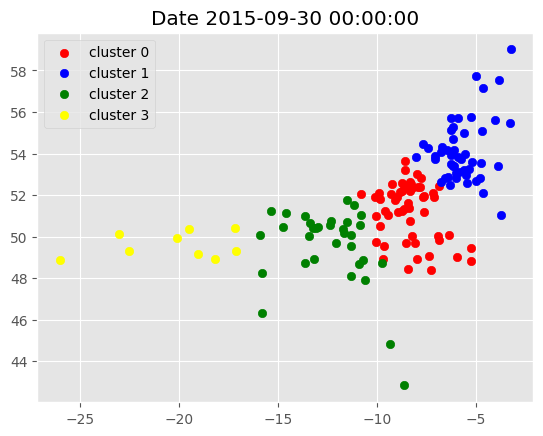

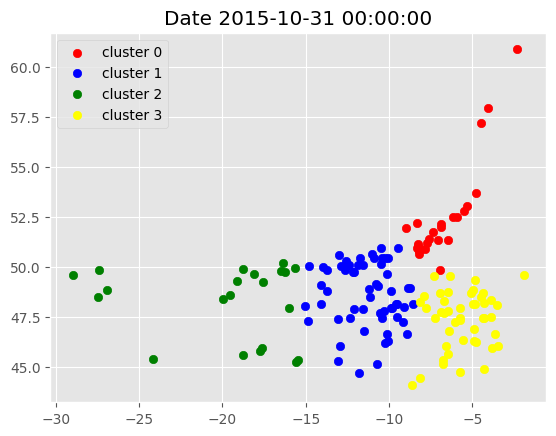

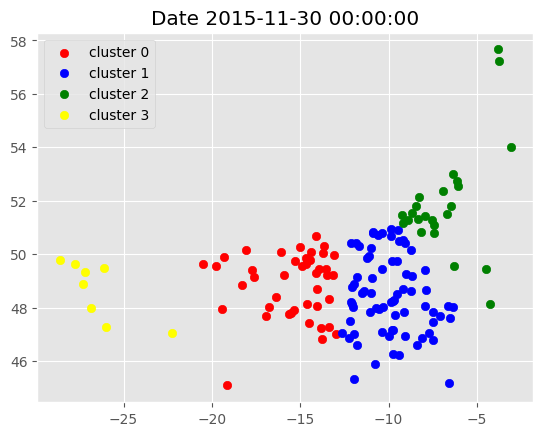

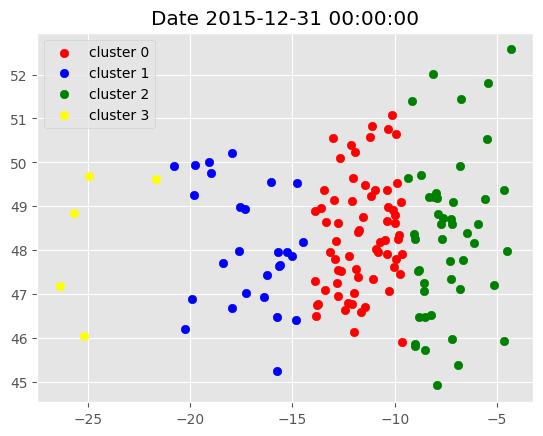

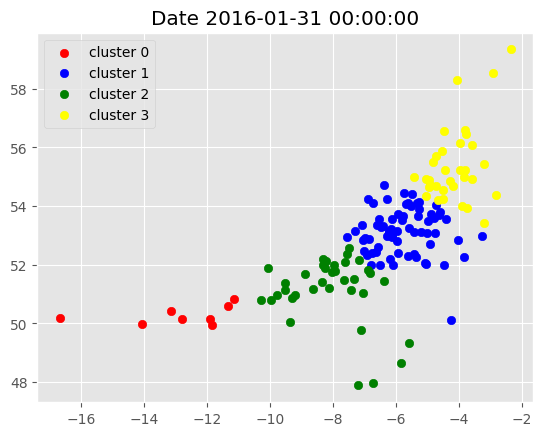

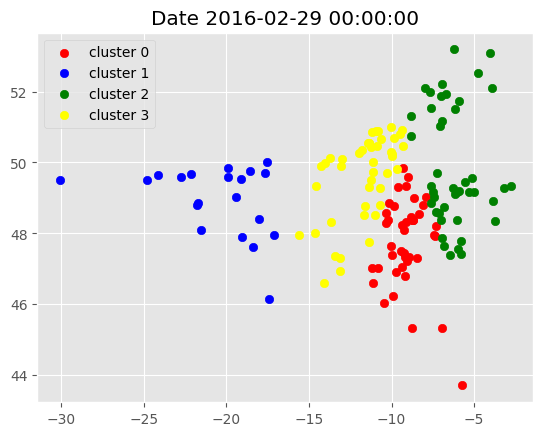

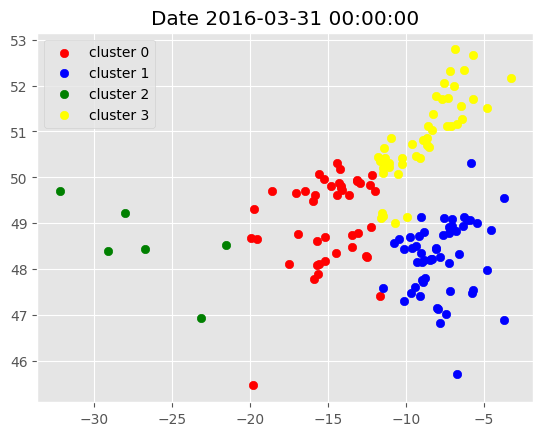

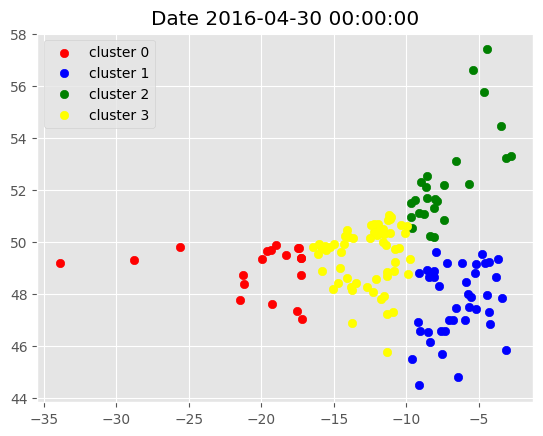

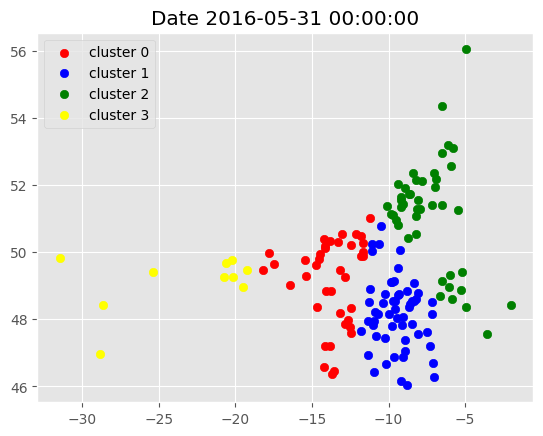

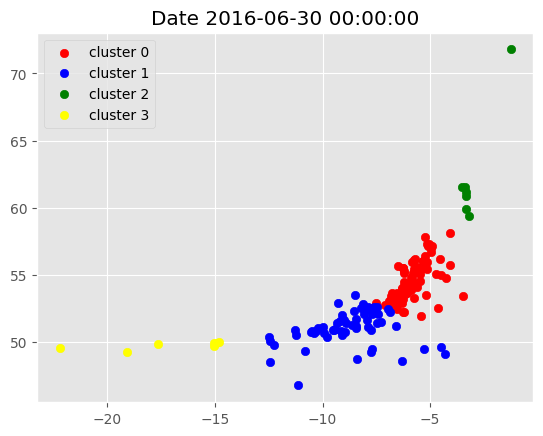

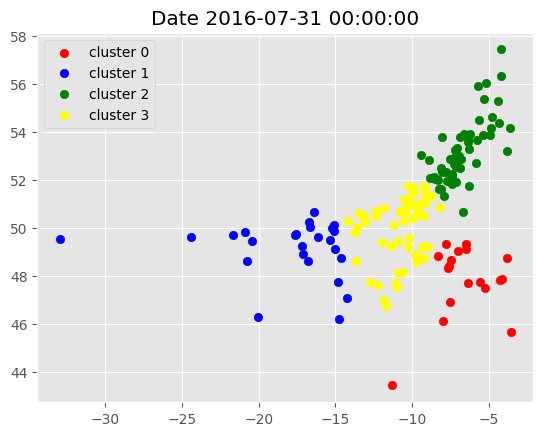

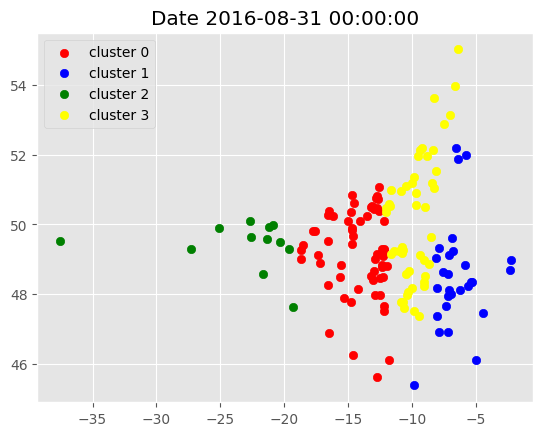

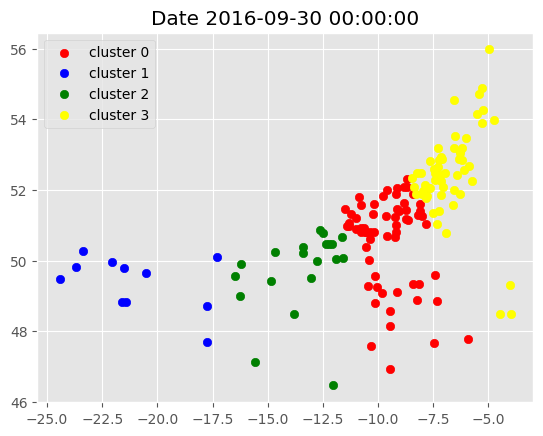

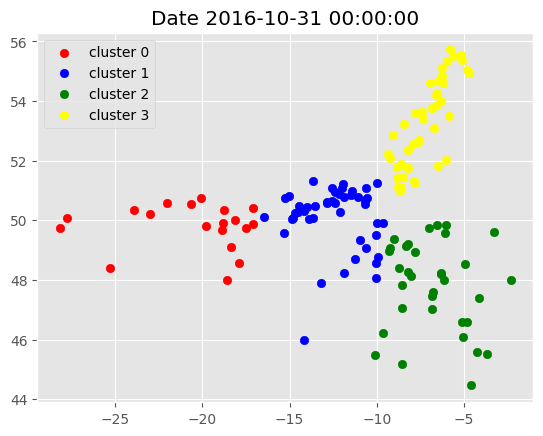

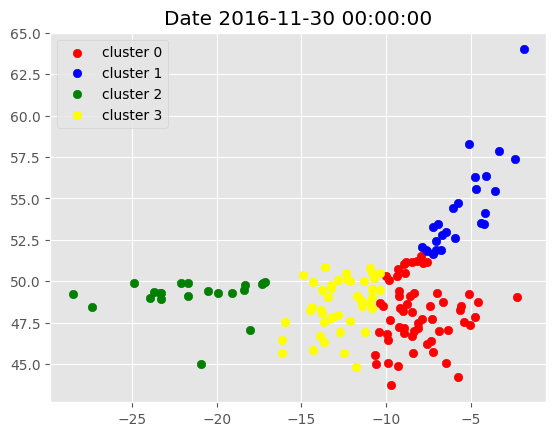

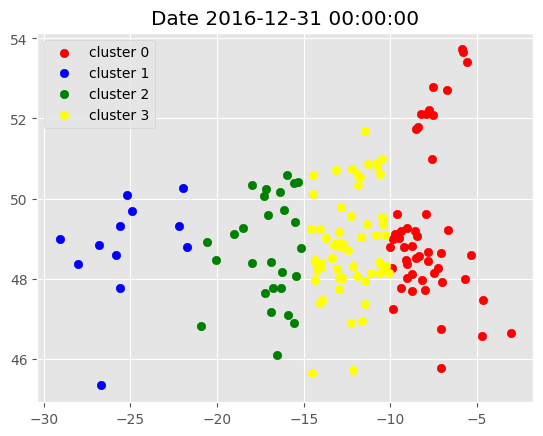

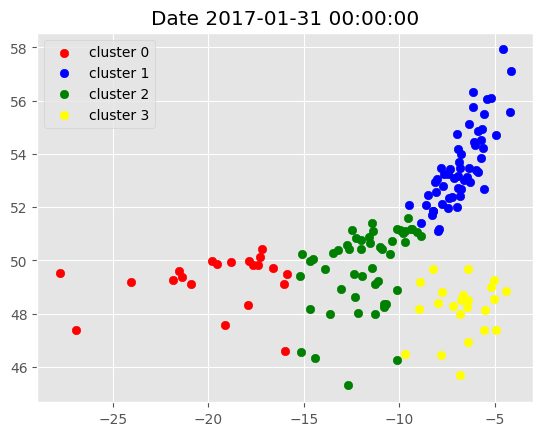

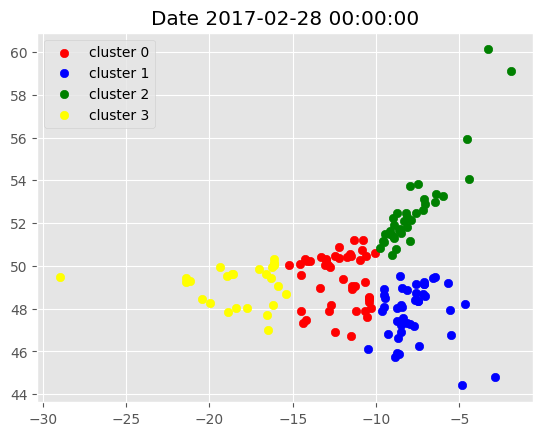

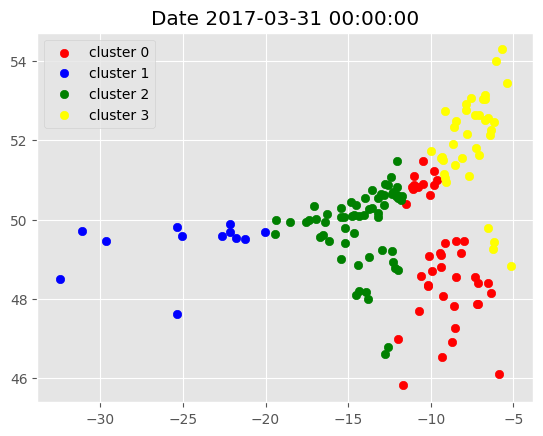

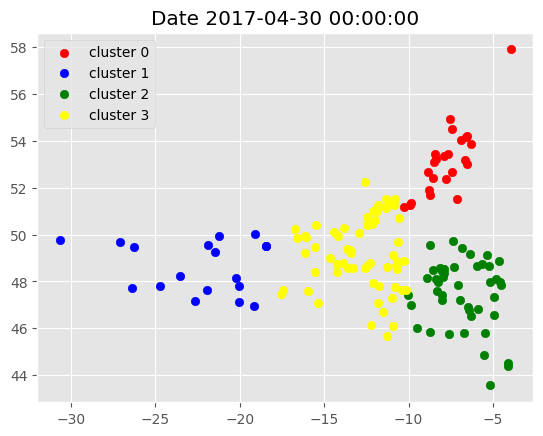

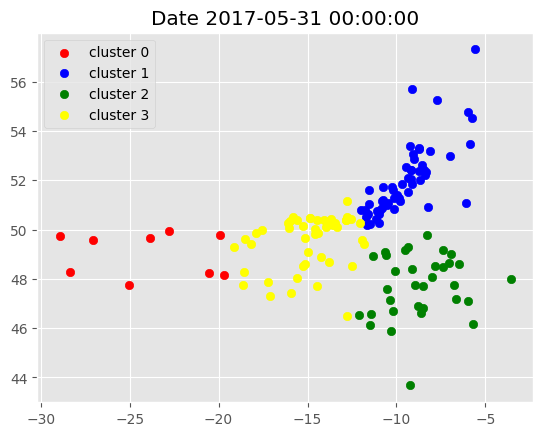

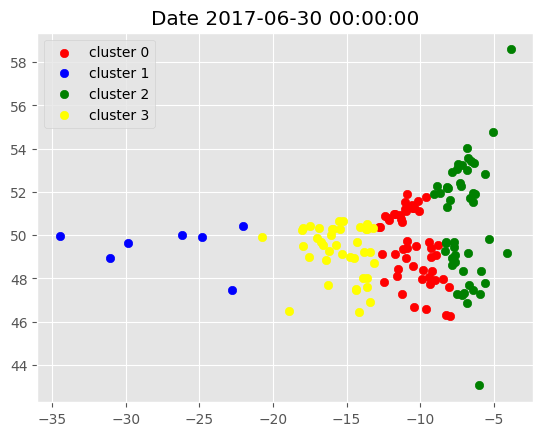

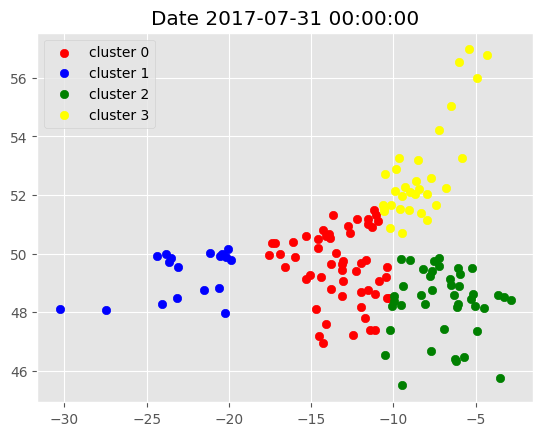

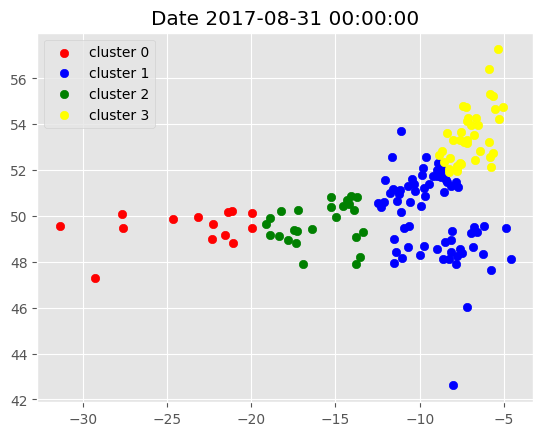

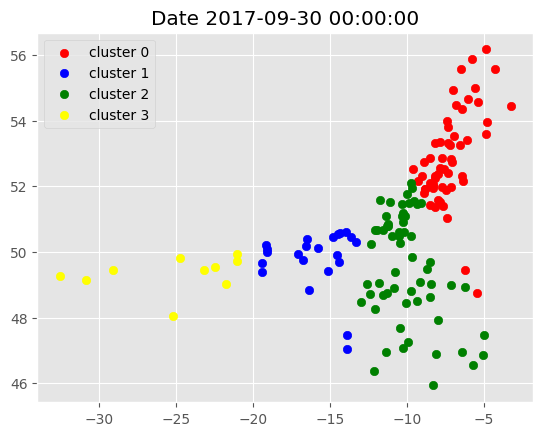

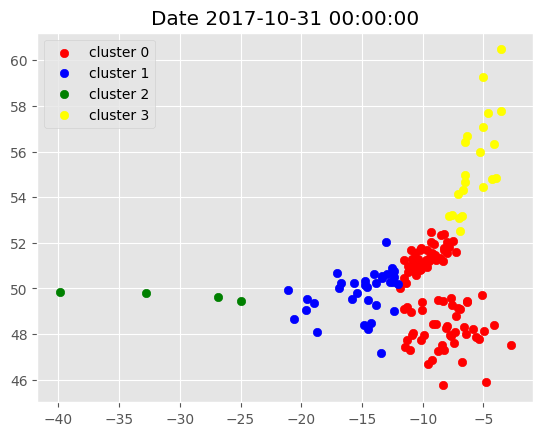

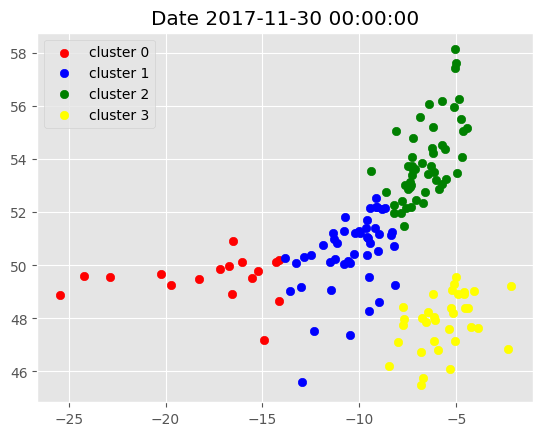

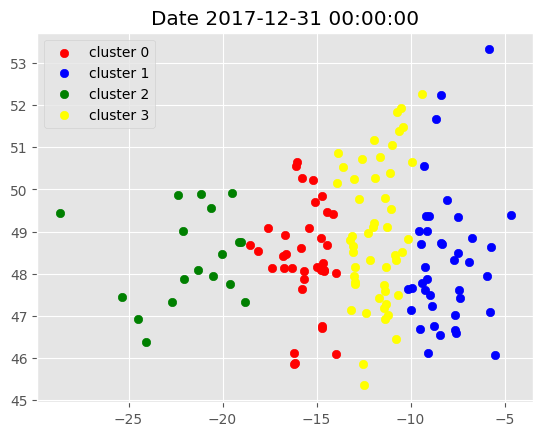

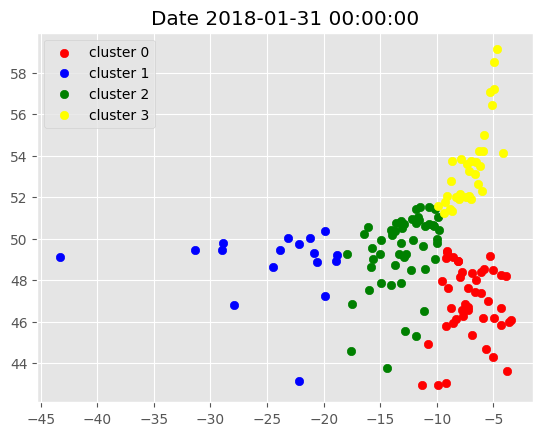

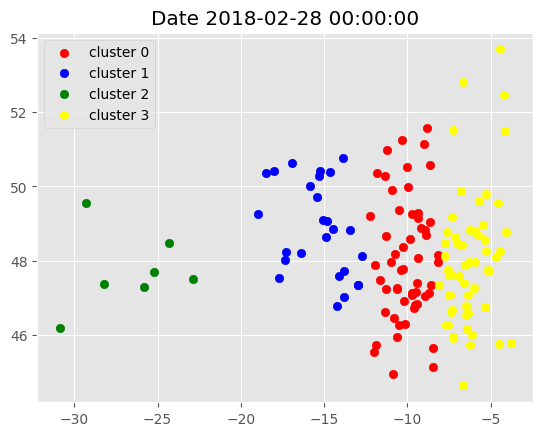

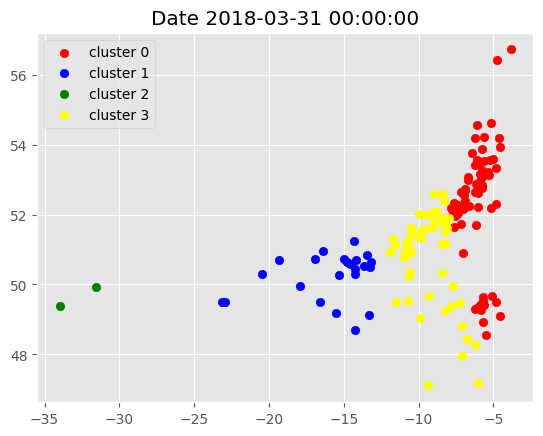

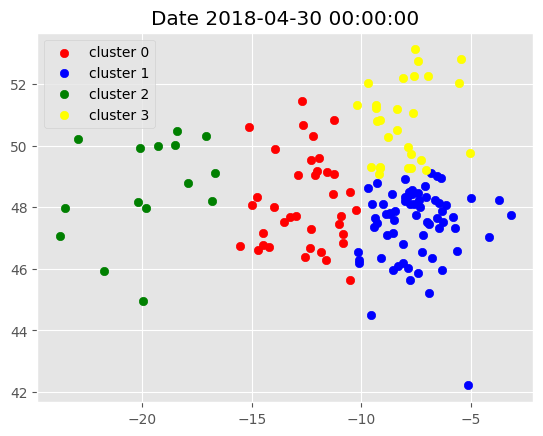

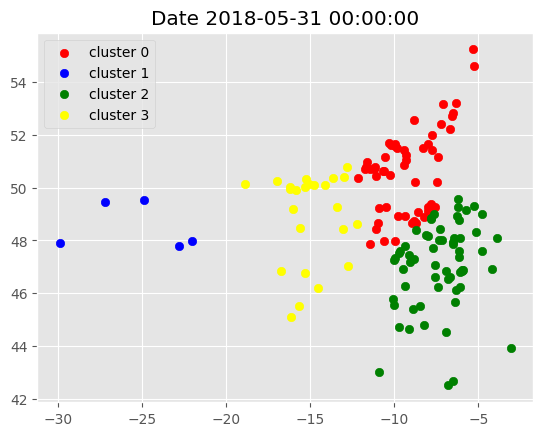

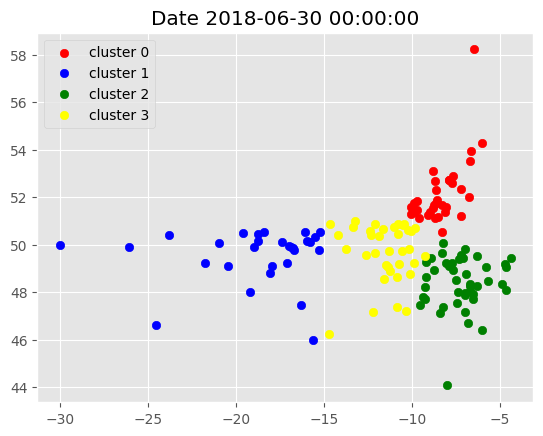

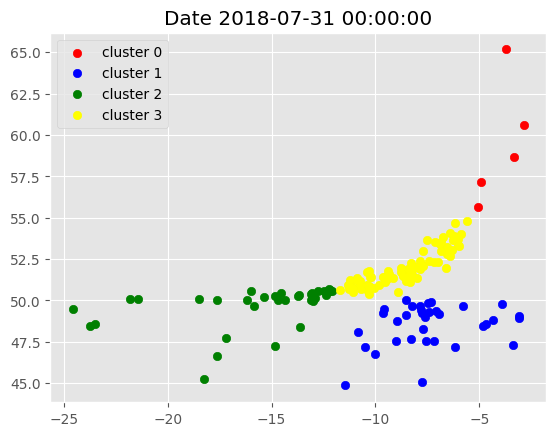

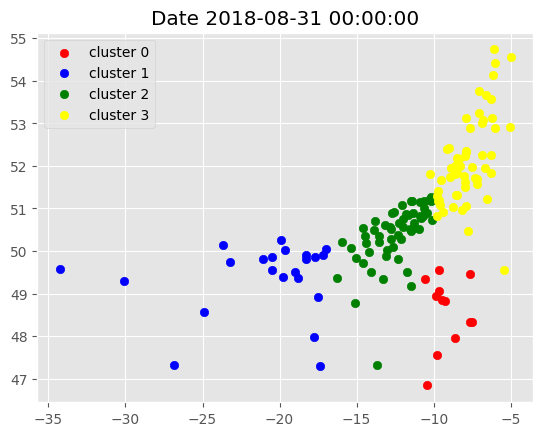

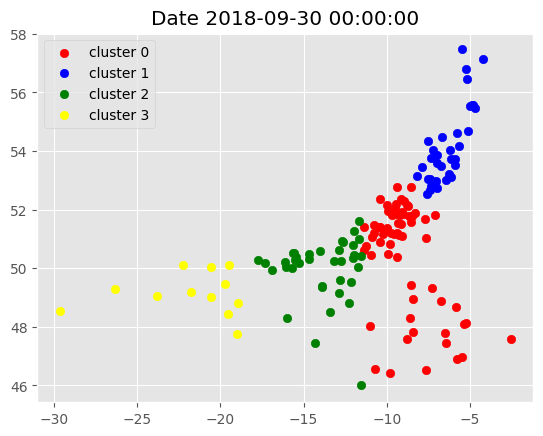

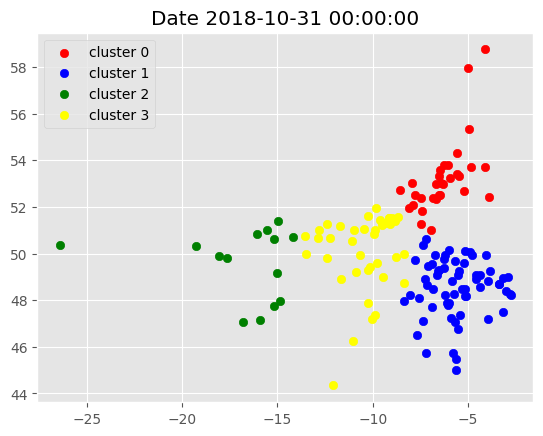

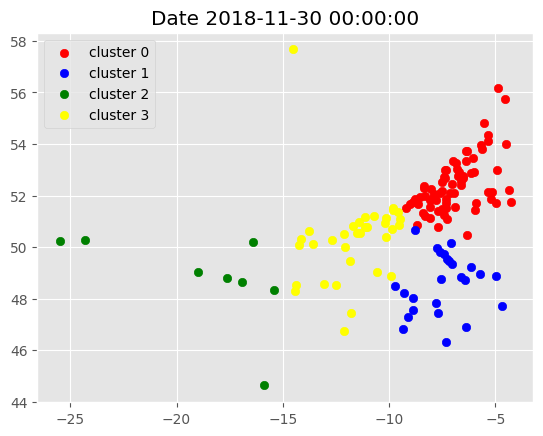

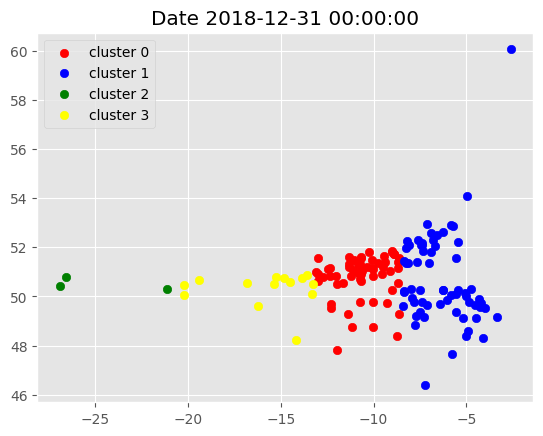

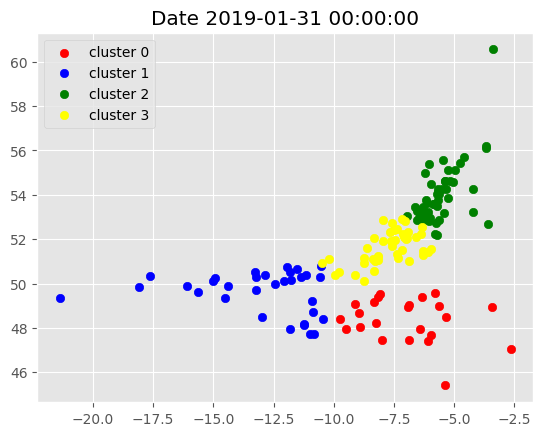

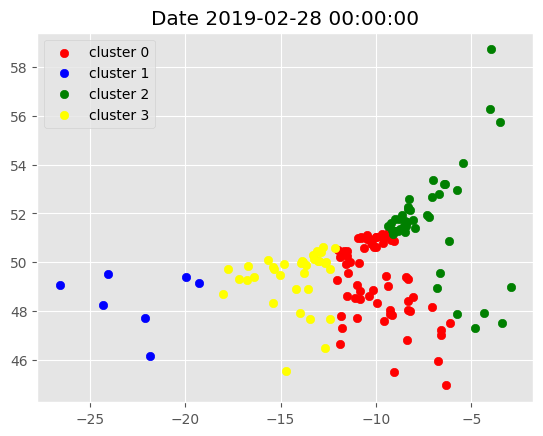

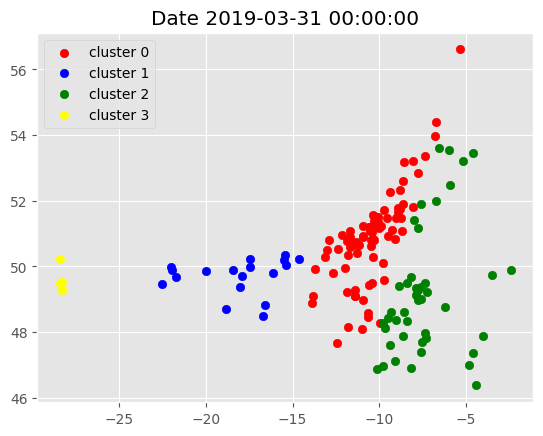

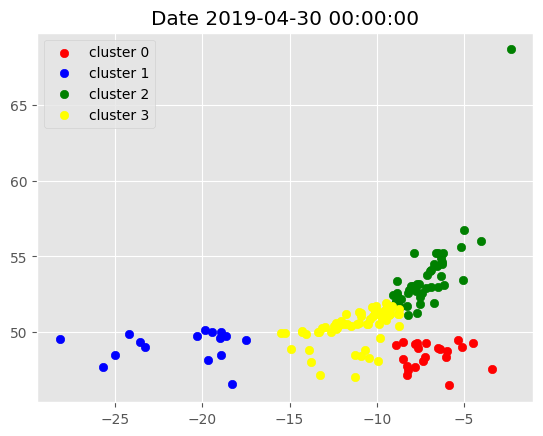

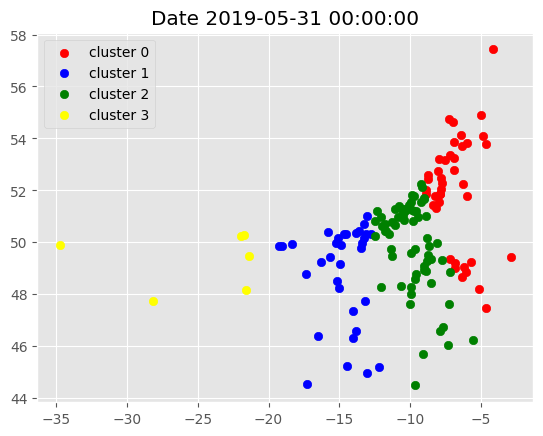

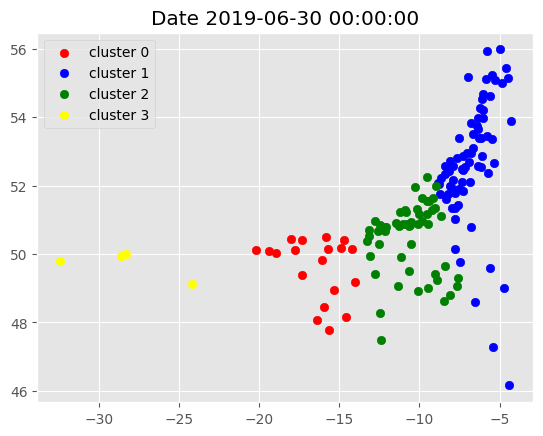

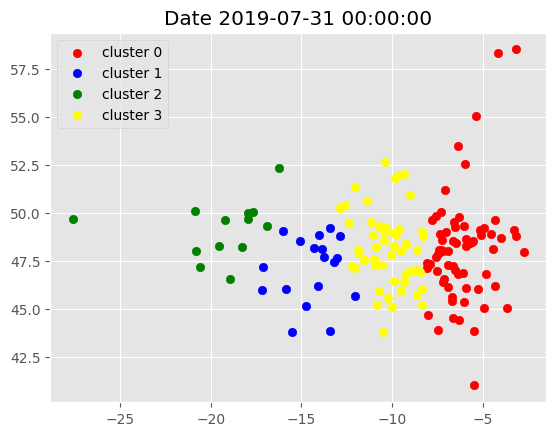

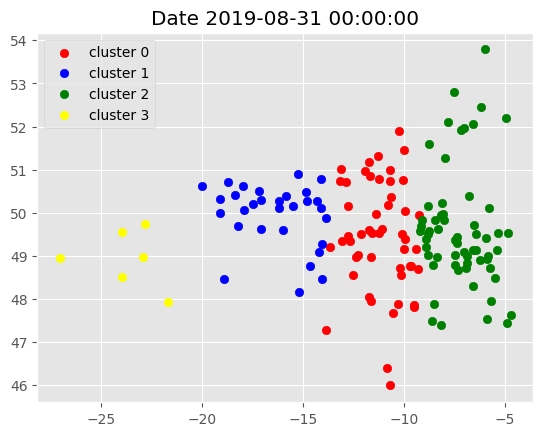

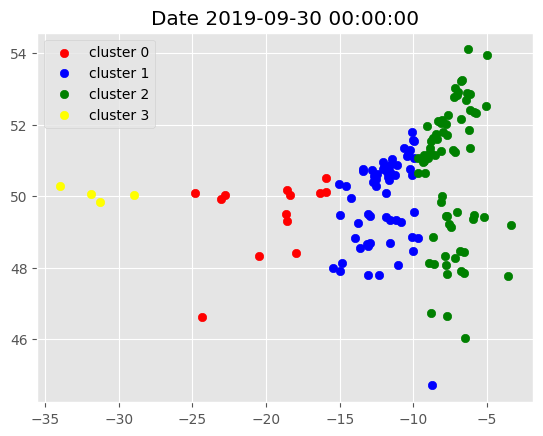

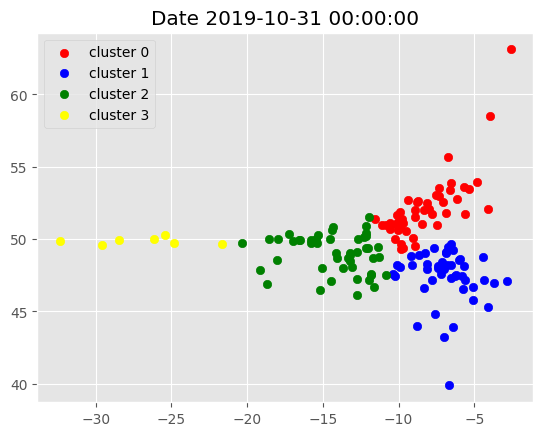

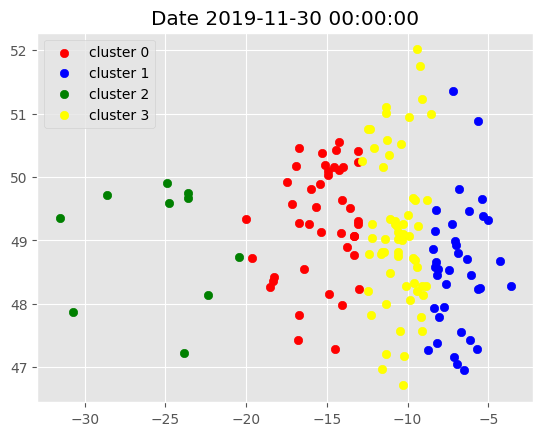

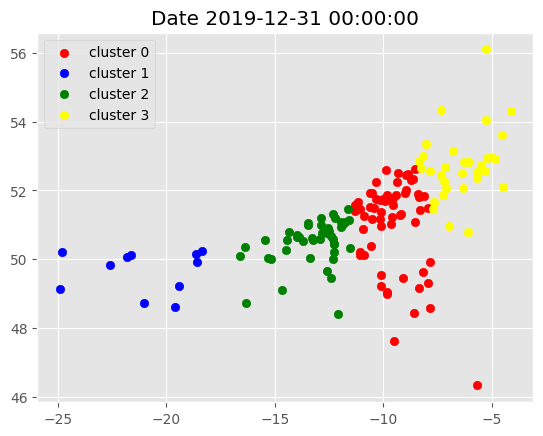

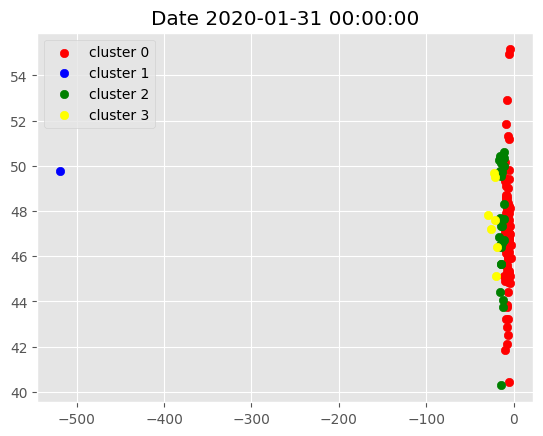

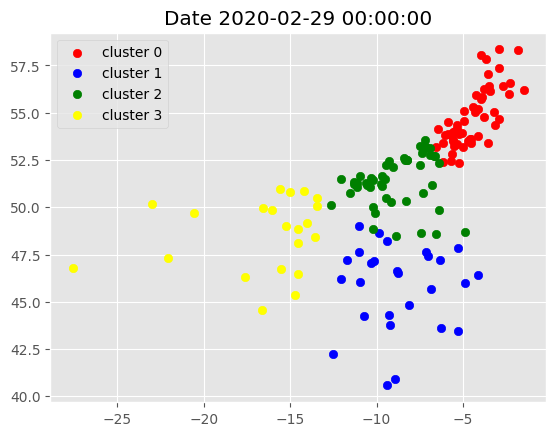

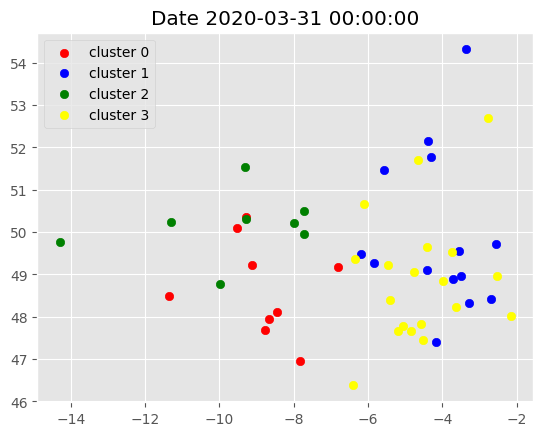

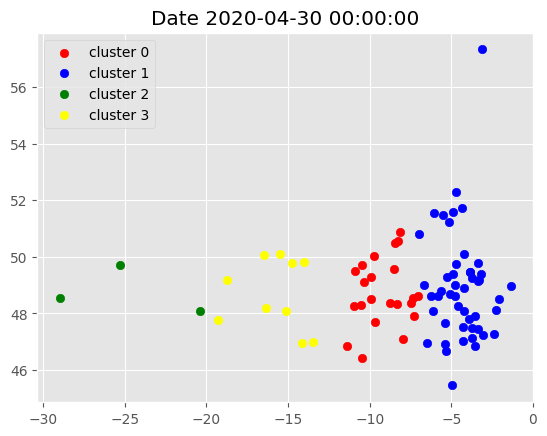

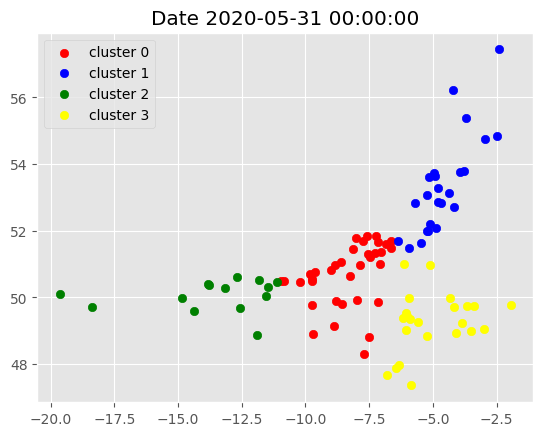

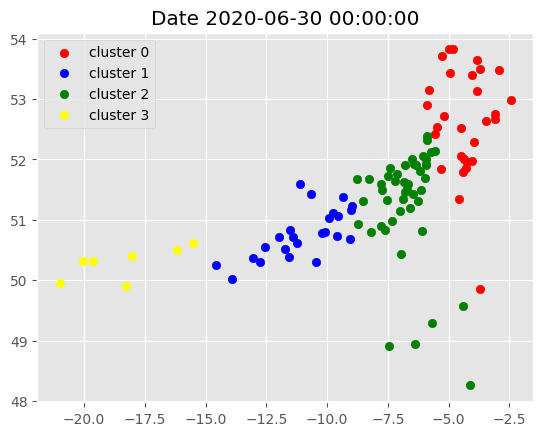

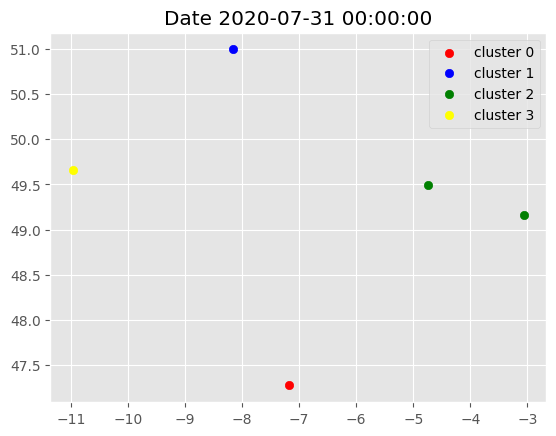

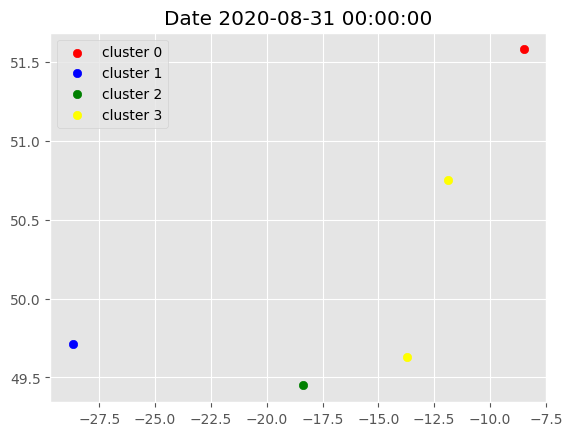

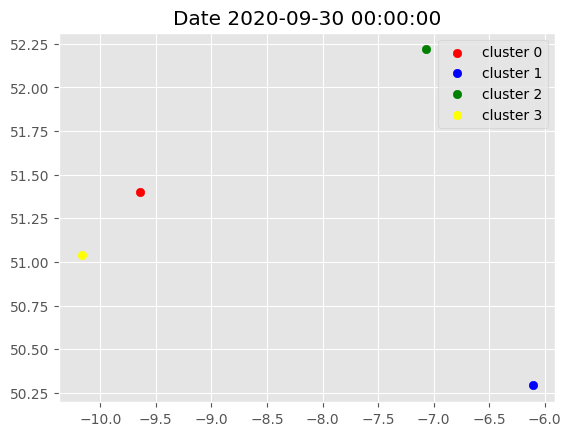

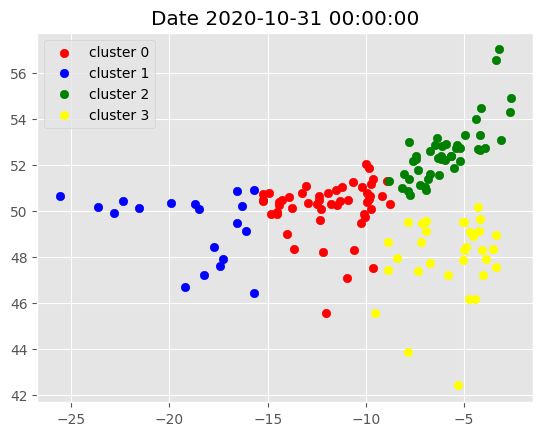

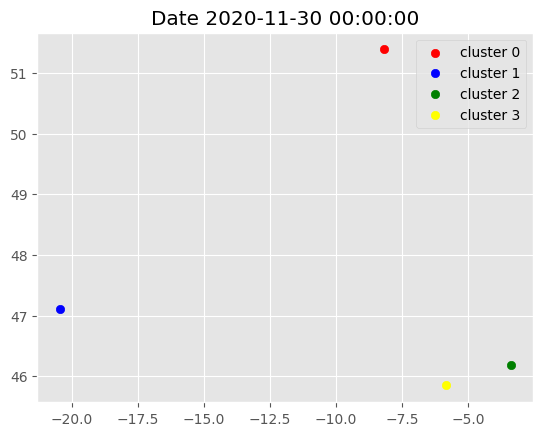

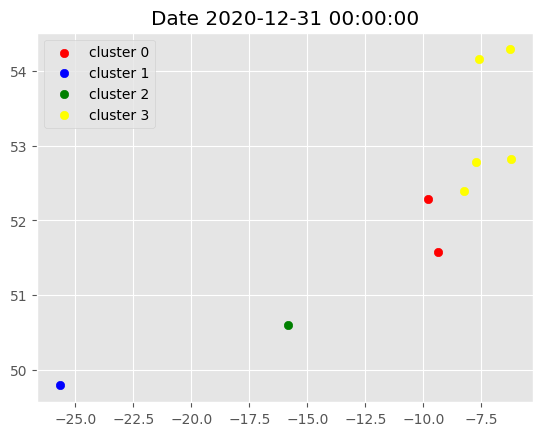

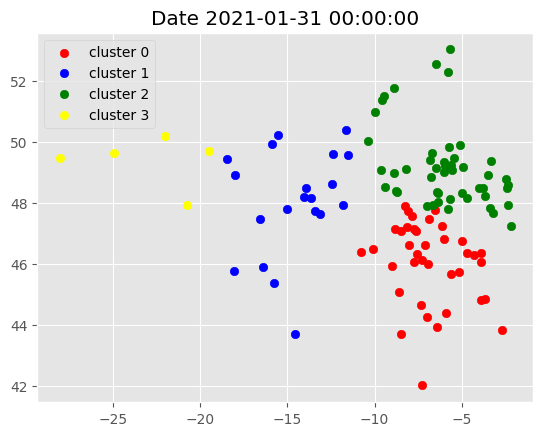

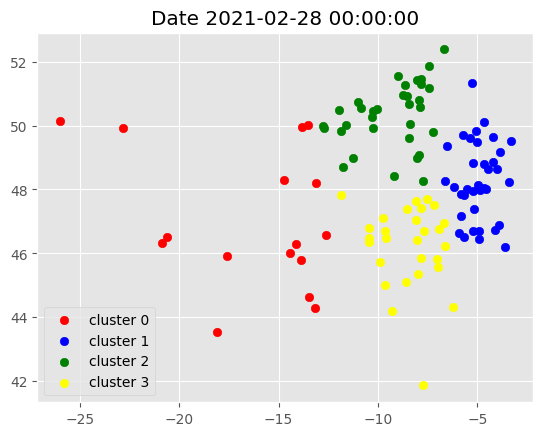

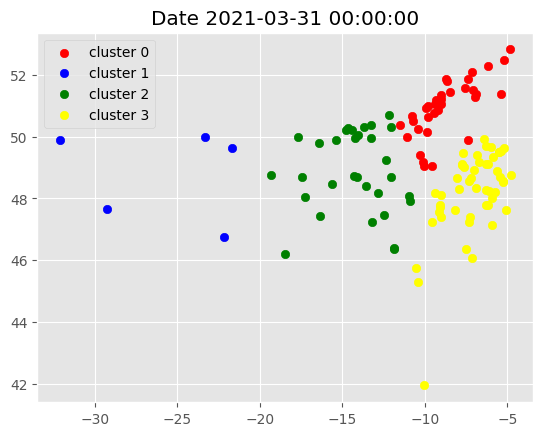

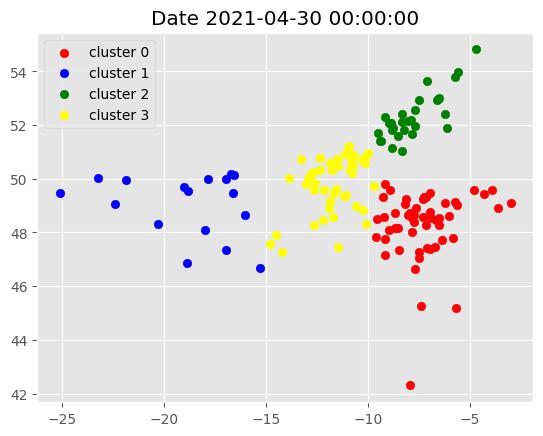

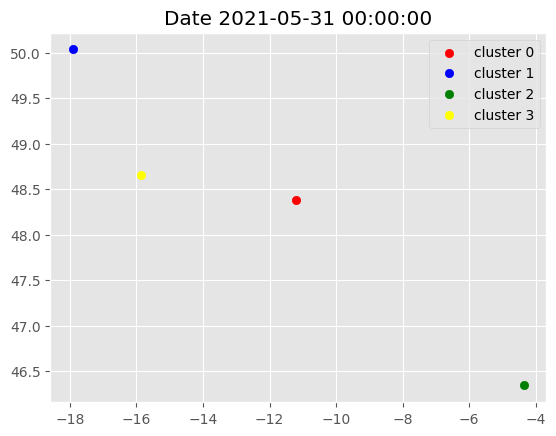

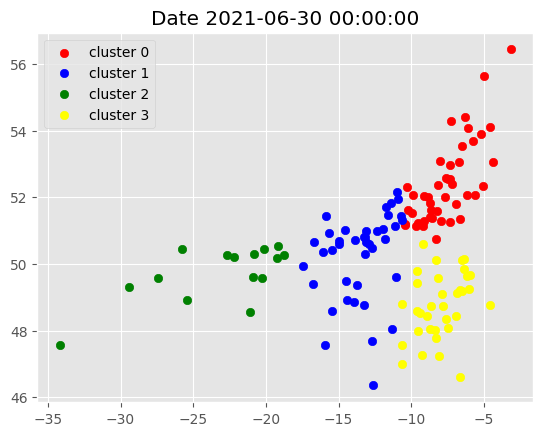

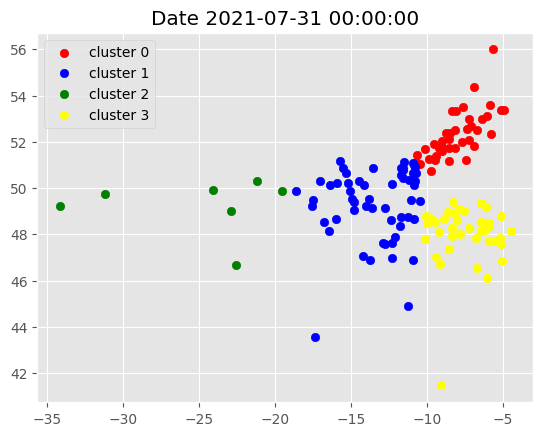

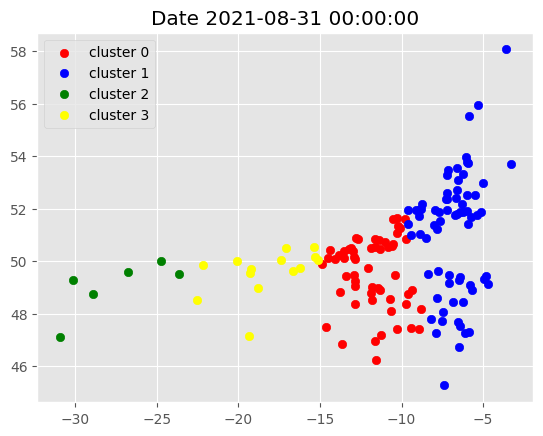

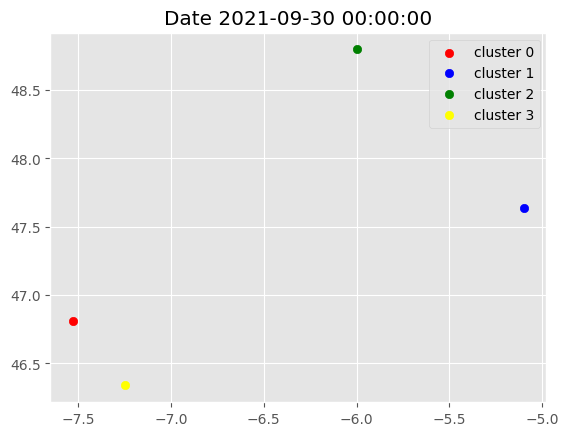

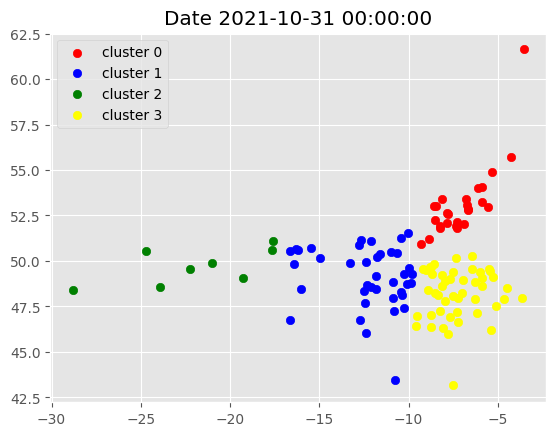

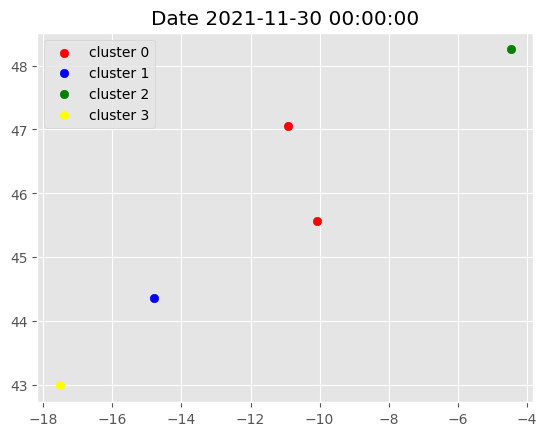

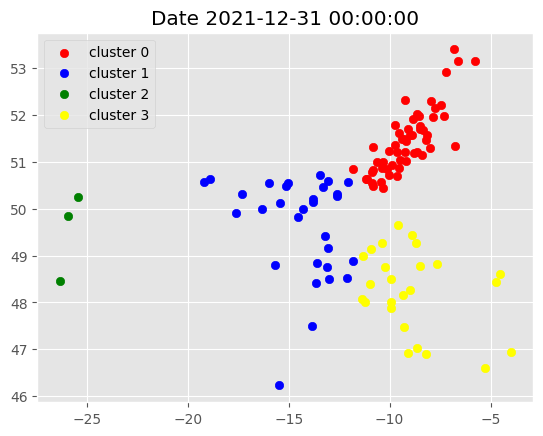

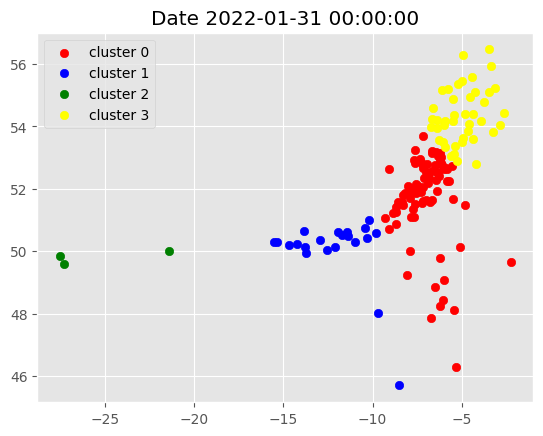

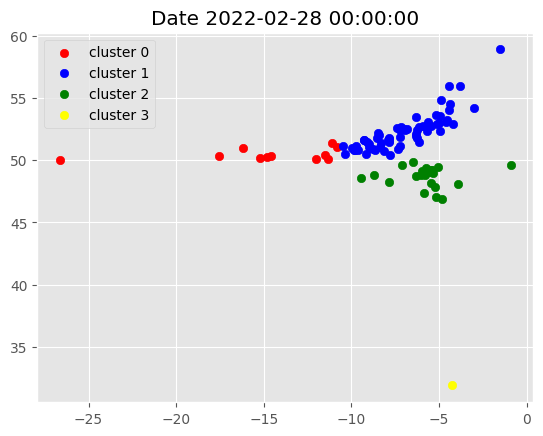

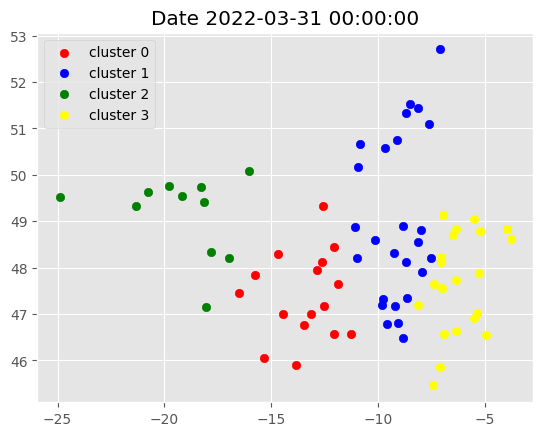

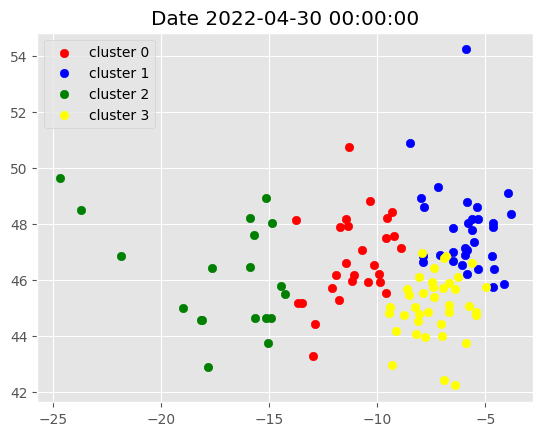

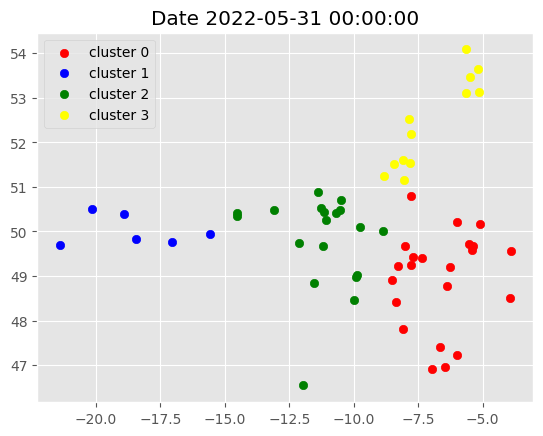

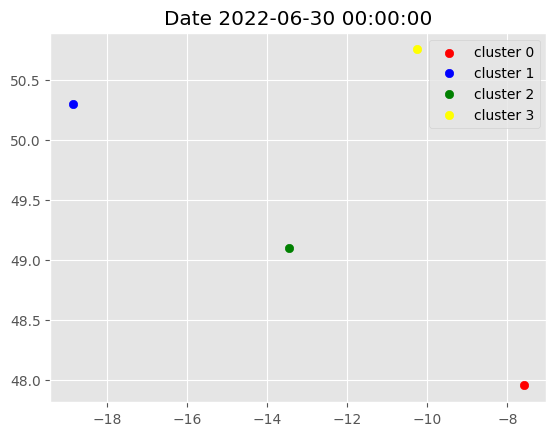

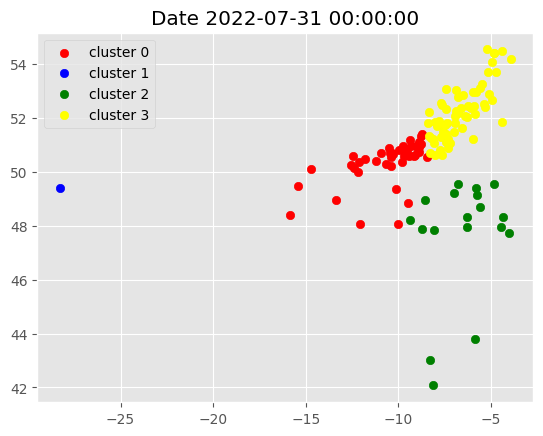

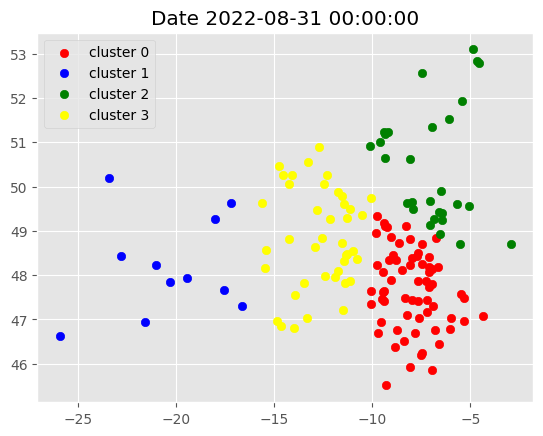

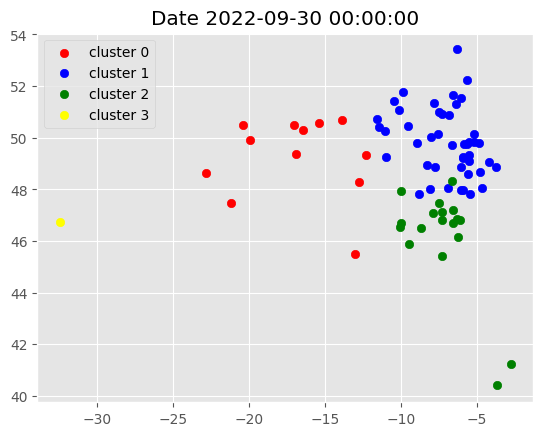

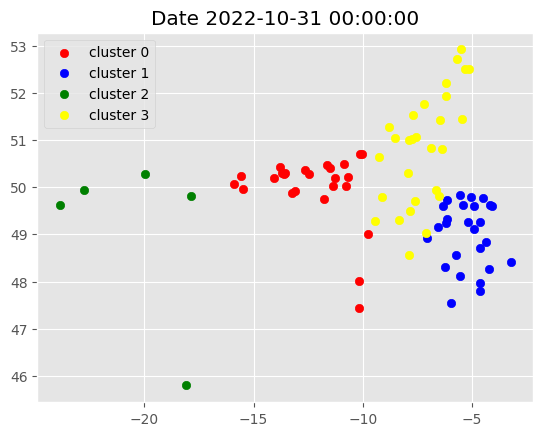

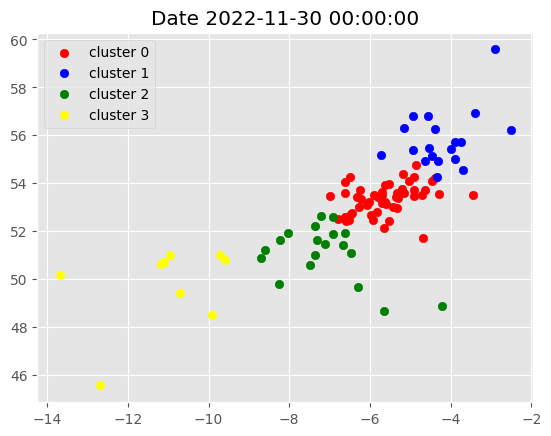

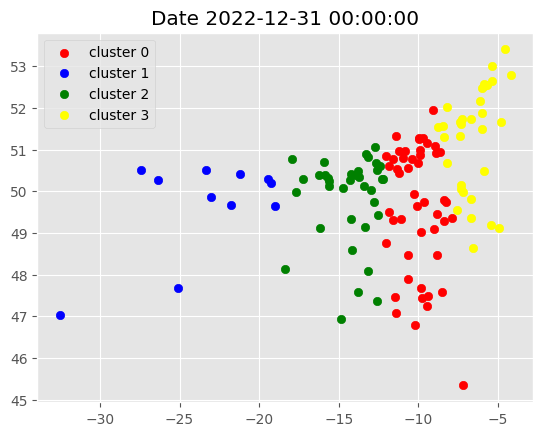

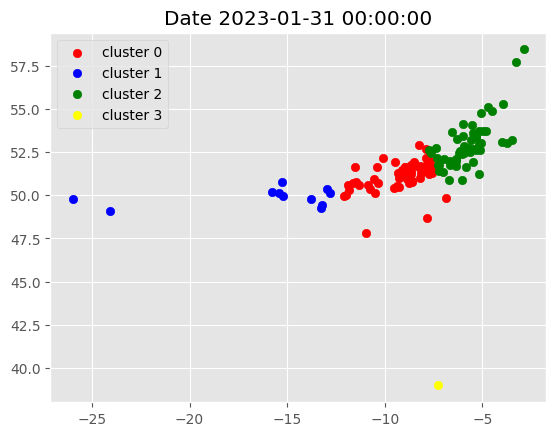

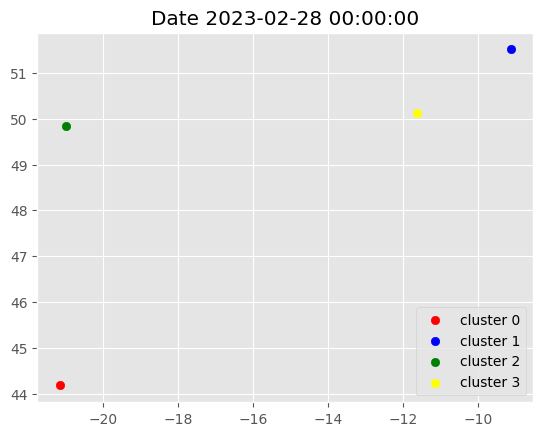

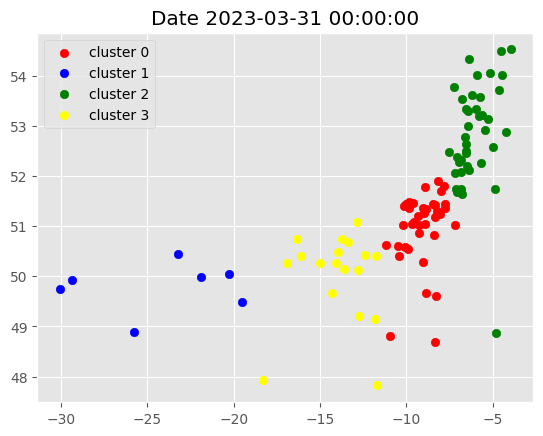

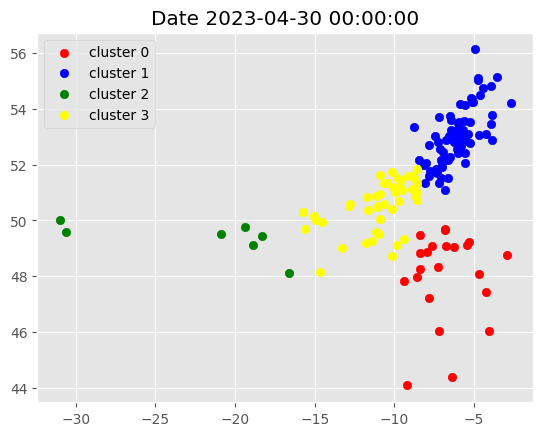

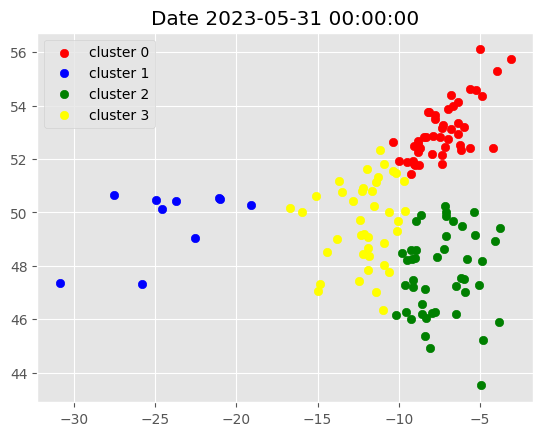

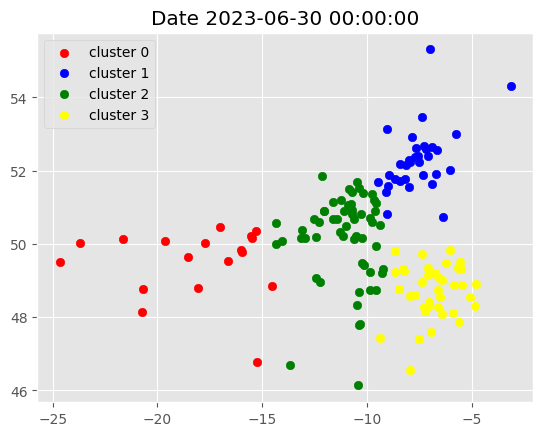

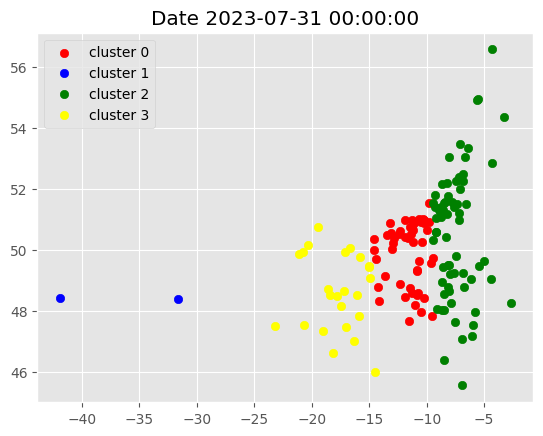

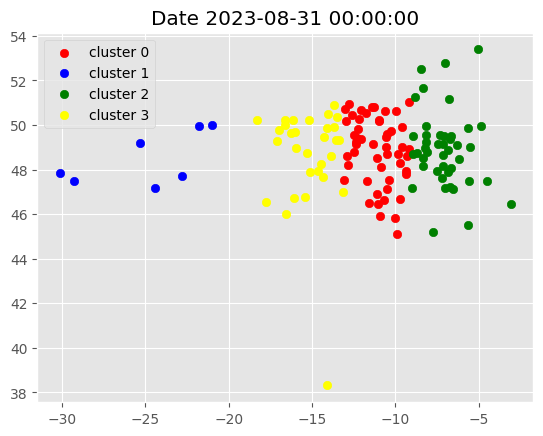

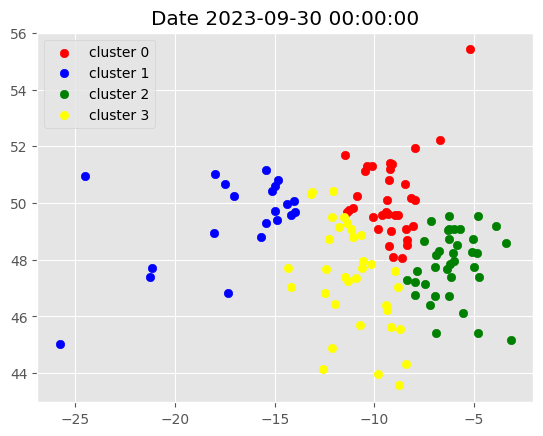

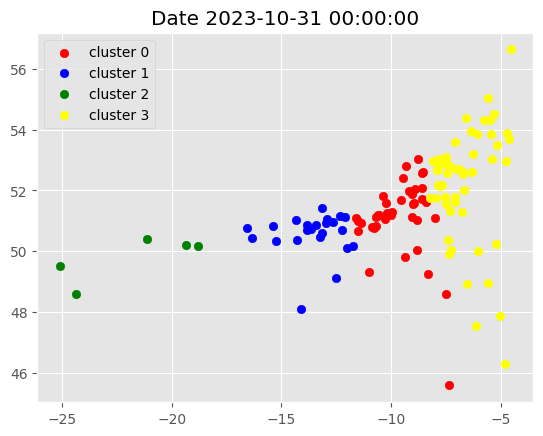

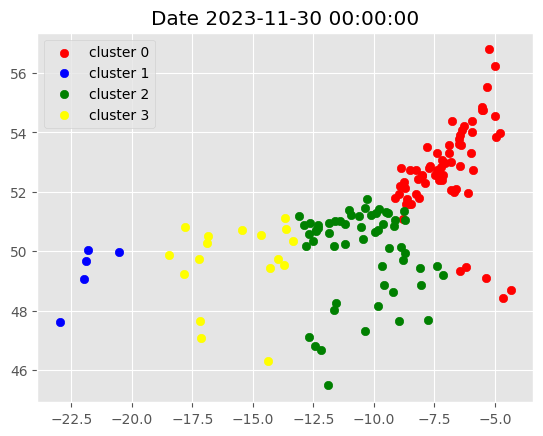

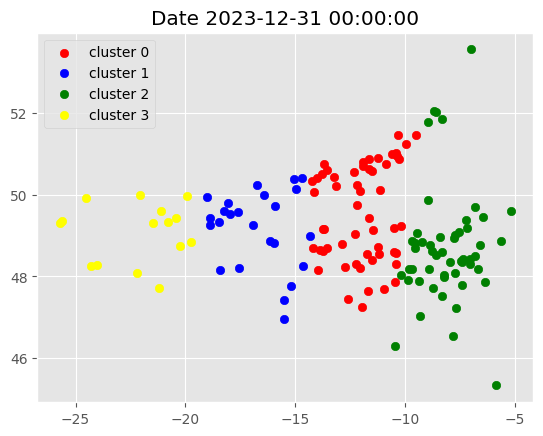

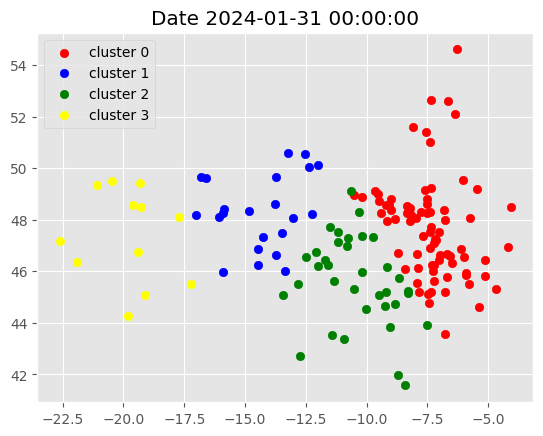

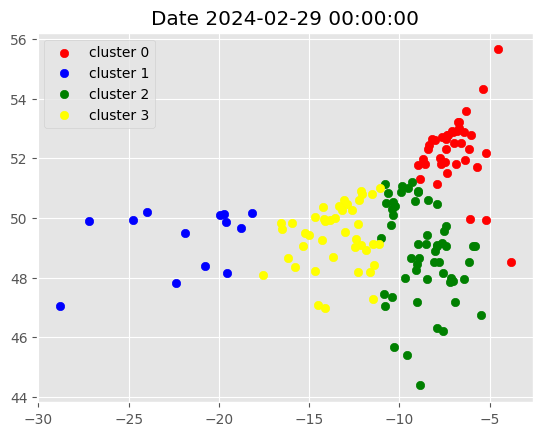

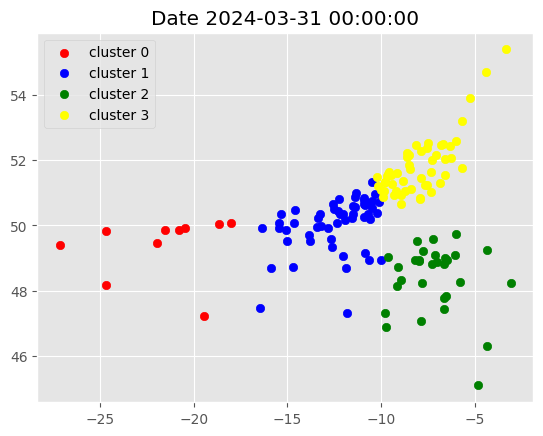

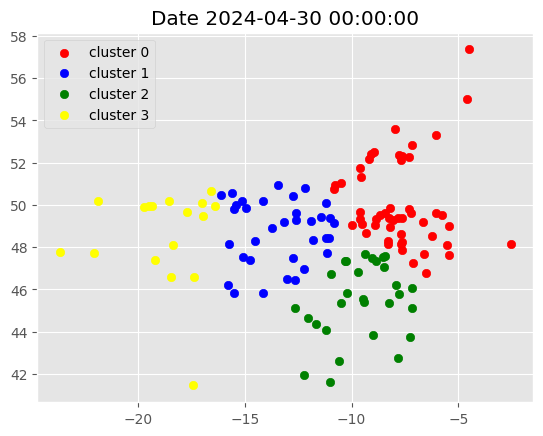

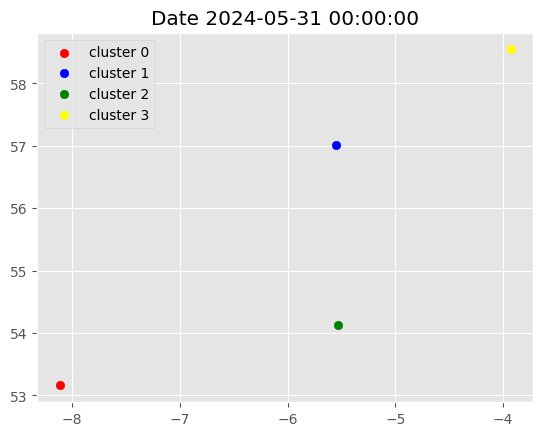

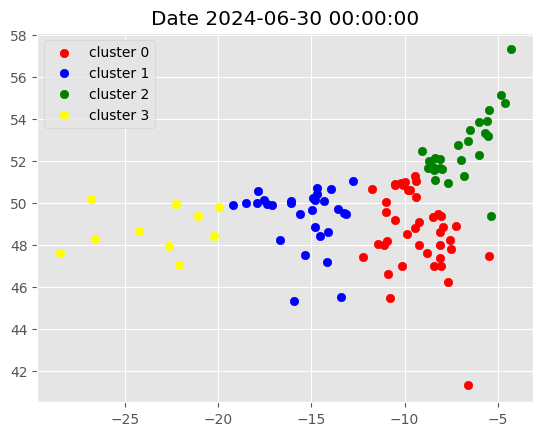

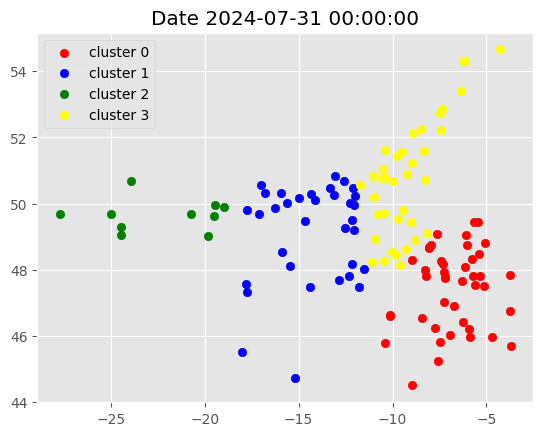

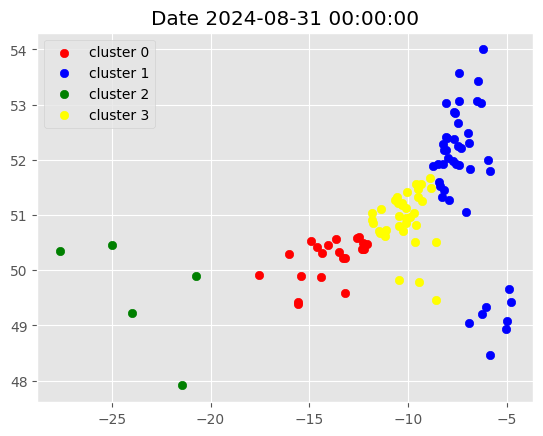

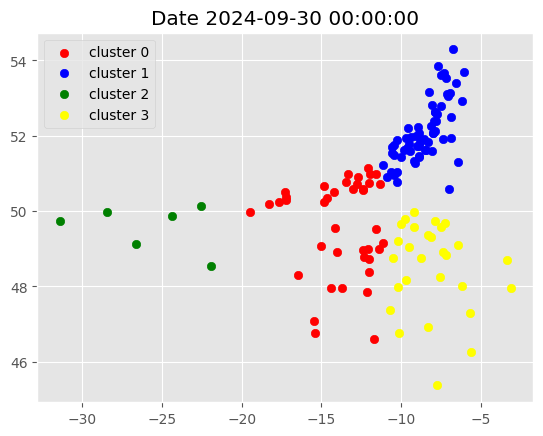

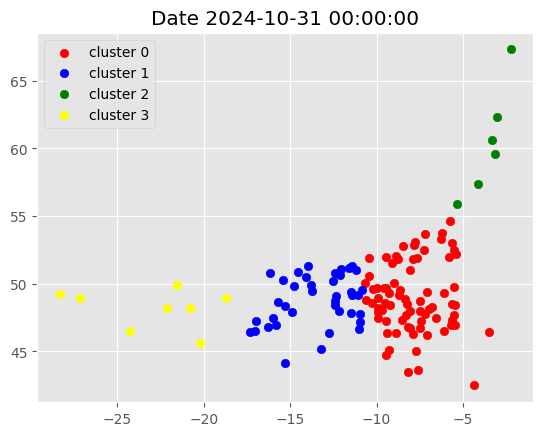

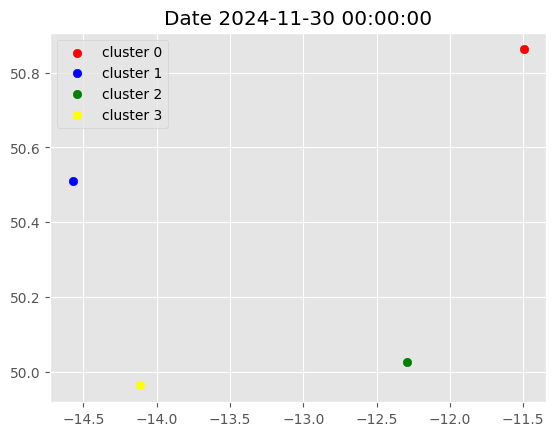

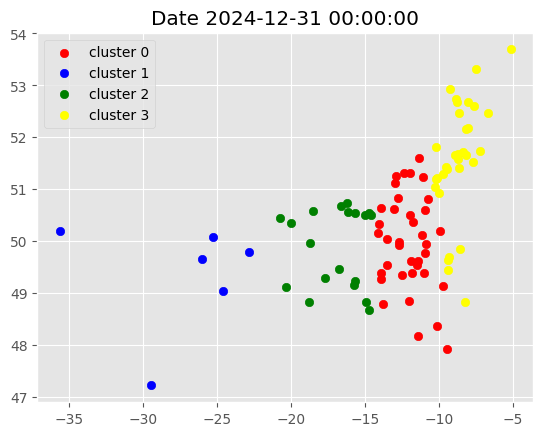

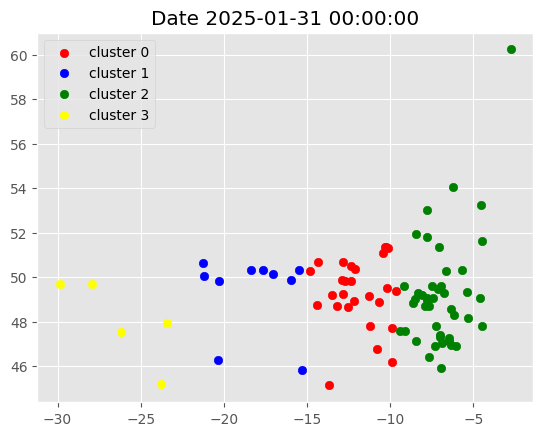

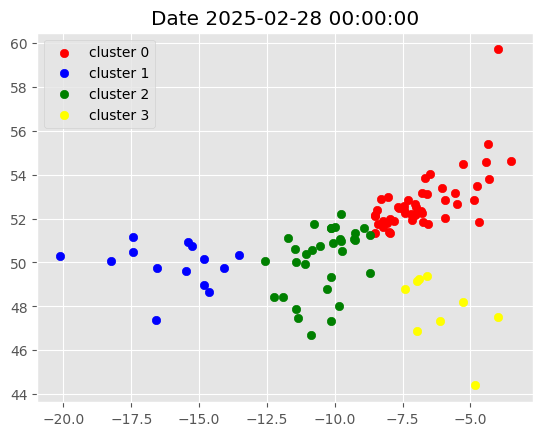

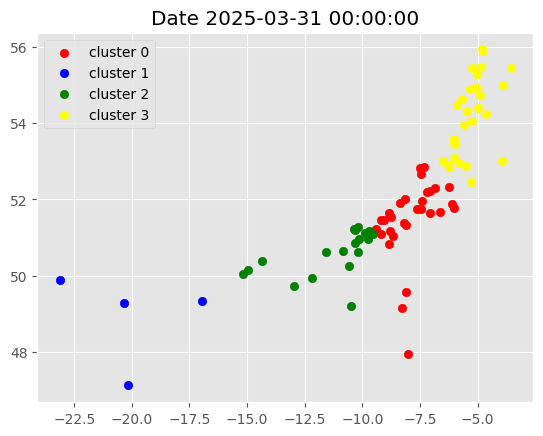

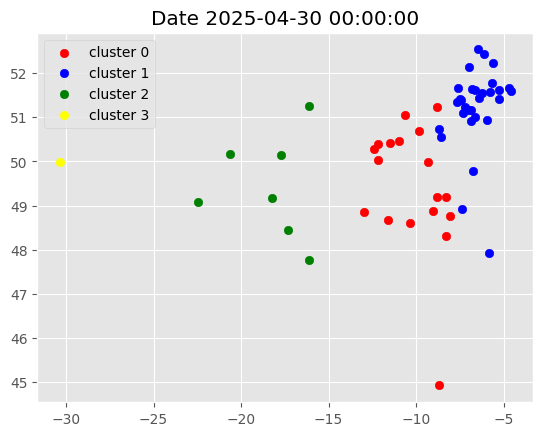

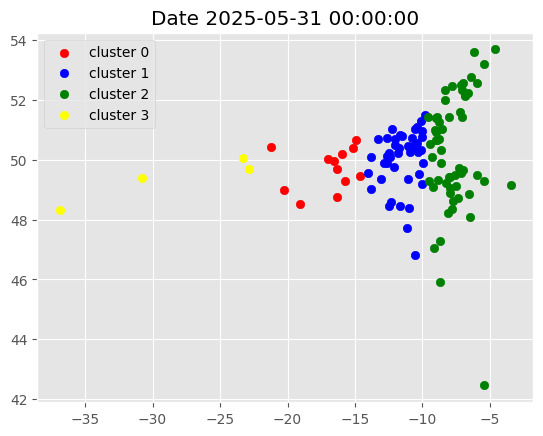

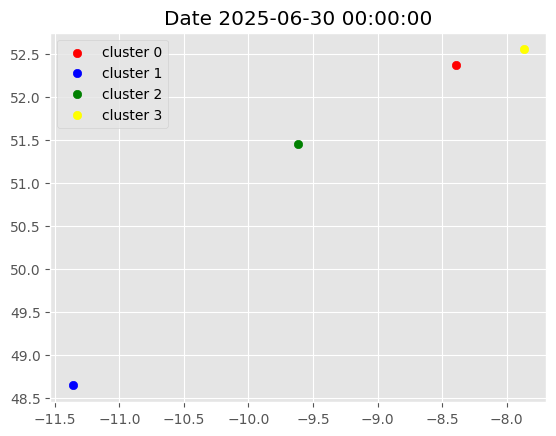

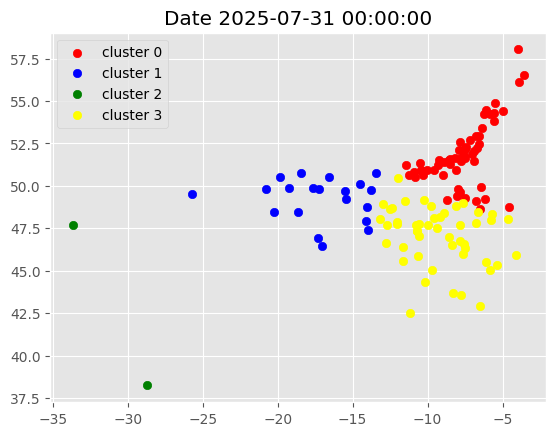

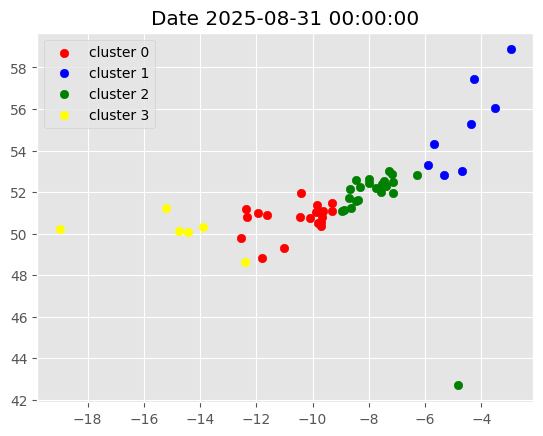

In [ ]:
plt.style.use('ggplot')
for i in data.index.get_level_values('date').unique().tolist():
  g = data.xs(i, level=0)
  plt.title(f'Date {i}')

  plot_clusters(g)

In [ ]:
target_rsi_values =[30,45,55,70]
initial_centroids=np.zeros((len(target_rsi_values),18))
initial_centroids

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

#7. for each month select assets based on the cluster and form a portfolio based on efficient frontier max sharpe ratio optimization
- we will filter only stocks corresponding to the cluster we choose based on our hypothesis
- momentum is persistent and the idea would be that stocks clusters around RS! 70 centroid should continue to outperform in the following month - thus we select stocks corresponding to cluster 3

In [ ]:
filtered_df=data[data['cluster']==3].copy()
filtered_df = filtered_df.reset_index(level=1)
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df = filtered_df.reset_index().set_index(['date','ticker'])
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates={}

for d in dates:
  fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d,level=0).index.tolist()
fixed_dates

{'2015-10-01': ['ACGL',
  'CDNS',
  'JBL',
  'KIM',
  'O',
  'SNPS',
  'SYY',
  'WELL',
  'WRB'],
 '2015-11-01': ['AAPL',
  'AIG',
  'AVY',
  'BAC',
  'BAX',
  'BK',
  'BX',
  'C',
  'CBRE',
  'CL',
  'CMCSA',
  'COP',
  'CTSH',
  'DE',
  'FITB',
  'HBAN',
  'HIG',
  'HPQ',
  'ICE',
  'IP',
  'IVZ',
  'JPM',
  'KHC',
  'KKR',
  'KMB',
  'MAR',
  'MCD',
  'MET',
  'MMM',
  'MOS',
  'MTCH',
  'NEM',
  'NSC',
  'ON',
  'PARA',
  'PCAR',
  'PFE',
  'POOL',
  'PRU',
  'RF',
  'RJF',
  'SPG',
  'TER',
  'TFC',
  'WFC',
  'XYL'],
 '2015-12-01': ['AMZN', 'BK', 'CAG', 'GM', 'ISRG', 'PNC', 'SWK', 'VRSN'],
 '2016-01-01': ['ATO', 'BMY', 'DOC', 'STLD', 'WMT'],
 '2016-02-01': ['AES',
  'AJG',
  'AOS',
  'AVGO',
  'BAX',
  'BRO',
  'CHD',
  'CL',
  'CMI',
  'CPT',
  'FI',
  'GIS',
  'GRMN',
  'HSIC',
  'ICE',
  'IEX',
  'INTC',
  'IRM',
  'J',
  'JKHY',
  'KMI',
  'LYV',
  'MSCI',
  'NDAQ',
  'NUE',
  'ODFL',
  'PCAR',
  'PNR',
  'PYPL',
  'ROL',
  'SMCI',
  'STLD',
  'TTWO'],
 '2016-03-01': ['AEP',


#8. define portfolio optimization function
- we will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio
- to optimize the weights of a given portfolio we would need to supply last 1 year prices to the function
- apply single stock weights bounds constraint for diversification - minimum half of equally weight and maximum 10% of portfolio

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices,lower_bound=0):
  returns = expected_returns.mean_historical_return(prices=prices, frequency = 252)
  cov = risk_models.sample_cov(prices=prices, frequency=252)
  ef = EfficientFrontier(expected_returns=returns,
                         cov_matrix=cov,
                         solver='SCS')
  # Set weight bounds using add_objective
  num_assets = len(prices.columns)
  ef.add_constraint(lambda w: w >= lower_bound)
  ef.add_constraint(lambda w: w <= 1)
  weights = ef.max_sharpe()
  return ef.clean_weights()

In [ ]:
stocks = data.index.get_level_values('ticker').unique().tolist()
new_df = yf.download(
    tickers=stocks,
    start=data.index.get_level_values('date').unique()[0] - pd.DateOffset(365*10),
    end=data.index.get_level_values('date').unique()[-1],
    group_by='ticker',
    auto_adjust=True   # THIS adjusts Close to Adj Close behind the scenes
)
#bec by default yfinance.download() does not return adj close when downloading multiple tickers, instead it returns: Open, High, Low, Close, Volume

new_df

[*********************100%***********************]  476 of 476 completed


Ticker            MPWR                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2005-10-03    7.285034    7.551351    7.276444    7.534170   110300   
2005-10-04    7.405307    7.714577    7.405307    7.508397   186400   
2005-10-05    7.568532    8.685341    7.327988    8.504933   384900   
2005-10-06    8.393254    8.745478    8.015256    8.470571   339800   
2005-10-07    8.504937    8.659573    8.419029    8.616618   124700   
...                ...         ...         ...         ...      ...   
2025-07-29  745.520020  751.489990  715.000000  724.369995   488700   
2025-07-30  734.460022  747.500000  726.049988  730.539978   629600   
2025-07-31  731.239990  740.000000  706.000000  711.239990  1344500   
2025-08-01  740.000000  803.000000  711.460022  785.619995  1524100   
2025-08-04  791.419983  831.969971  778.900024  830.630005  1360400   

Ticker             WEC                                               ...  \
Price             Open        High         Low       Close   Volume  ...   
Date                                                                 ...   
2005-10-03   10.814810   10.996275   10.790434   10.942107   790200  ...   
2005-10-04   10.982736   11.058573   10.825646   10.825646   683400  ...   
2005-10-05   10.828352   10.887938   10.451879   10.454587   464600  ...   
2005-10-06   10.481671   10.519589   10.191868   10.321873  1063600  ...   
2005-10-07   10.346253   10.438340   10.273124   10.302917   992800  ...   
...                ...         ...         ...         ...      ...  ...   
2025-07-29  107.949997  108.660004  107.389999  108.629997  2094000  ...   
2025-07-30  108.550003  110.080002  107.970001  108.360001  3216700  ...   
2025-07-31  107.919998  109.339996  107.919998  109.080002  3314900  ...   
2025-08-01  109.949997  111.070000  109.260002  110.239998  3367400  ...   
2025-08-04  110.250000  111.639999  110.000000  111.269997  2021300  ...   

Ticker            AES                                                    WSM  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2005-10-03  10.660221  11.124562  10.627521  11.013382   3420300   12.275485   
2005-10-04  11.176879  11.281519  11.091858  11.183419   5376800   12.230825   
2005-10-05  11.150718  11.248820  10.876038  10.889118   4153900   12.122365   
2005-10-06  10.889117  10.980678  10.522877  10.705997   3634500   12.084084   
2005-10-07  10.705997  11.065697  10.686377  10.908737   2467400   12.170216   
...               ...        ...        ...        ...       ...         ...   
2025-07-29  13.309449  13.408111  13.052929  13.250253  11333500  188.559998   
2025-07-30  13.200922  13.220654  12.747078  12.904937   9419600  188.289993   
2025-07-31  12.924669  13.062795  12.796409  12.973999  15200000  189.889999   
2025-08-01  13.160000  13.760000  13.000000  13.230000  19650900  184.199997   
2025-08-04  13.340000  13.560000  13.170000  13.430000   9848100  191.720001   

Ticker                                                   
Price             High         Low       Close   Volume  
Date                                                     
2005-10-03   12.549833   12.198923   12.230824  2410800  
2005-10-04   12.230825   12.045799   12.090462  3252400  
2005-10-05   12.170217   12.071324   12.084085  3720200  
2005-10-06   12.281869   11.946909   12.026662  2504600  
2005-10-07   12.406283   12.154265   12.275489  1773400  
...                ...         ...         ...      ...  
2025-07-29  188.559998  184.259995  187.110001  1173300  
2025-07-30  192.380005  186.720001  190.529999  1949000  
2025-07-31  191.330002  186.039993  187.050003  1328400  
2025-08-01  189.449997  181.509995  187.669998  1407300  
2025-08-04  201.100006  191.720001  200.520004  1712600  

[4990 

In [ ]:
data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12)

Timestamp('2014-09-30 00:00:00')

- calculate daily returns for each stock which should land up in our portfolio
- then loop over each month start, select the stocks for the month and calculate their weights for the next month
- if the maximum sharpe ratio optimization fails for a given month apply equally weights weights
- calculate each day portfolio return

In [ ]:
from pandas.tseries.offsets import MonthEnd

close_prices = new_df.xs('Close', axis=1, level=1)

returns_dataframe = np.log(close_prices).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = pd.to_datetime(start_date) + MonthEnd(0)
        end_date_str = end_date.strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        # Define lookback window for optimization
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(365 * 10)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        print("Rebalance Start:", start_date)
        print("Rebalance End  :", end_date_str)
        print("Assets         :", cols)
        print("Opt. Start     :", optimization_start_date)
        print("Opt. End       :", optimization_end_date)

        # Extract price data
        optimization_df = close_prices[cols].loc[optimization_start_date:optimization_end_date].dropna()

        try:

            # Optimize weights
           weights = optimize_weights(prices=optimization_df, lower_bound=round(1 / (len(optimization_df.columns) * 2), 3))

           weights = pd.dataFrame(weights, index=pd.Series(0))
        except:
          print(f'Max Sharpe Optimization failed for {start_date},continuing with equal weights')

        # Extract returns for those assets in this period
        period_returns = returns_dataframe[cols].loc[start_date:end_date_str]

        # Multiply each return by the weight
        weighted_returns = (period_returns * weights).sum(axis=1)

        # Make temp_df with correct structure
        temp_df = weighted_returns.to_frame(name='strategy return')

        # Append to portfolio_df
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print("Error in", start_date, ":", str(e))


Rebalance Start: 2015-10-01
Rebalance End  : 2015-10-31
Assets         : ['ACGL', 'CDNS', 'JBL', 'KIM', 'O', 'SNPS', 'SYY', 'WELL', 'WRB']
Opt. Start     : 2005-10-03
Opt. End       : 2015-09-30
Max Sharpe Optimization failed for 2015-10-01,continuing with equal weights
Rebalance Start: 2015-11-01
Rebalance End  : 2015-11-30
Assets         : ['AAPL', 'AIG', 'AVY', 'BAC', 'BAX', 'BK', 'BX', 'C', 'CBRE', 'CL', 'CMCSA', 'COP', 'CTSH', 'DE', 'FITB', 'HBAN', 'HIG', 'HPQ', 'ICE', 'IP', 'IVZ', 'JPM', 'KHC', 'KKR', 'KMB', 'MAR', 'MCD', 'MET', 'MMM', 'MOS', 'MTCH', 'NEM', 'NSC', 'ON', 'PARA', 'PCAR', 'PFE', 'POOL', 'PRU', 'RF', 'RJF', 'SPG', 'TER', 'TFC', 'WFC', 'XYL']
Opt. Start     : 2005-11-03
Opt. End       : 2015-10-31
Max Sharpe Optimization failed for 2015-11-01,continuing with equal weights
Rebalance Start: 2015-12-01
Rebalance End  : 2015-12-31
Assets         : ['AMZN', 'BK', 'CAG', 'GM', 'ISRG', 'PNC', 'SWK', 'VRSN']
Opt. Start     : 2005-12-03
Opt. End       : 2015-11-30
Max Sharpe O

In [ ]:
portfolio_df

strategy return
Date                       
2015-10-01        -0.001610
2015-10-02         0.008887
2015-10-05         0.012479
2015-10-06        -0.005048
2015-10-07         0.014585
...                     ...
2025-07-29         0.000000
2025-07-30         0.006718
2025-07-31        -0.008558
2025-08-01        -0.006850
2025-08-04         0.008133

[2386 rows x 1 columns]

<Axes: xlabel='Date'>

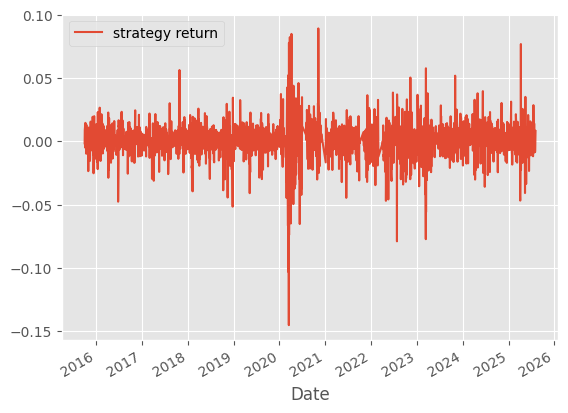

In [ ]:
portfolio_df.plot()

#9. Visualize portfolio returns and compare to SP500 returns

In [ ]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today(),
                  auto_adjust=True)
spr_ret = np.log(spy['Close']).diff().dropna().rename({'Close': 'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spr_ret, left_index=True, right_index=True)
portfolio_df

[*********************100%***********************]  1 of 1 completed


strategy return       SPY
Date                                 
2015-10-01        -0.001610  0.002606
2015-10-02         0.008887  0.014827
2015-10-05         0.012479  0.017638
2015-10-06        -0.005048 -0.003432
2015-10-07         0.014585  0.008157
...                     ...       ...
2025-07-29         0.000000 -0.002641
2025-07-30         0.006718 -0.001260
2025-07-31        -0.008558 -0.003758
2025-08-01        -0.006850 -0.016526
2025-08-04         0.008133  0.015085

[2386 rows x 2 columns]

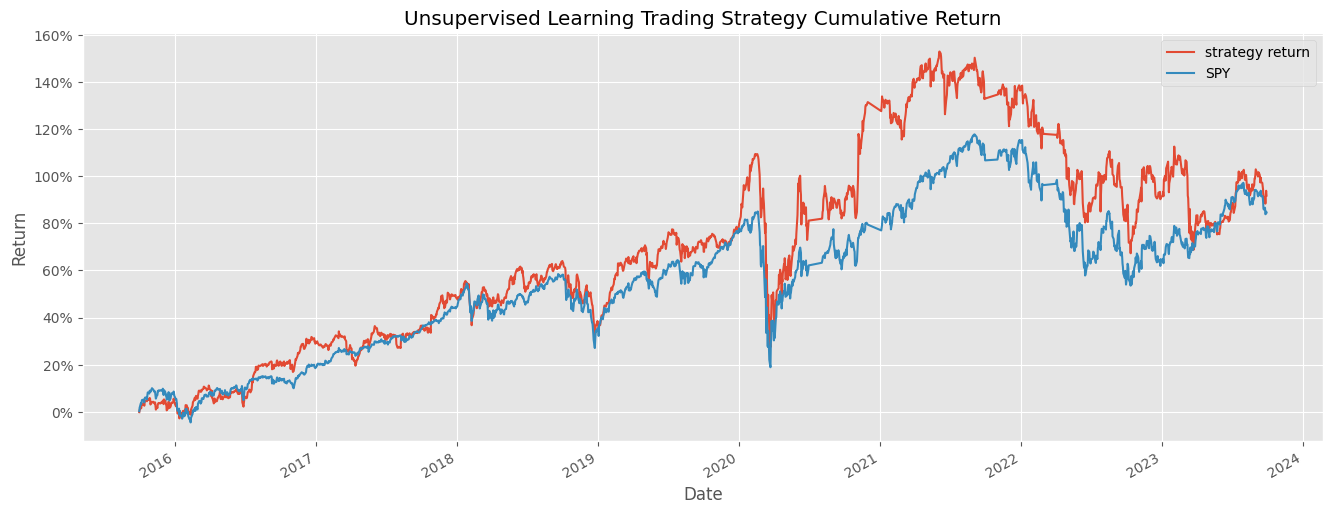

In [ ]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Cumulative Return')
plt.ylabel('Return')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()